# Client: ABC Tech | Category: ITSM - ML Project Ref: PRCL-0012 – IT Services

#### 📌 This project focuses on leveraging Machine Learning (ML) to optimize IT Service Management (ITSM) processes using historical incident  data from ABC Tech (2012-2014) with 46,000+ records stored in MySQL.
#### 📌 The primary objective is to enhance incident resolution efficiency,  minimize delays, and improve resource planning through predictive analytics and automation.



| **Section**                 | **Description**  |
|-----------------------------|----------------------------------------------------------------|
| **📌 Project Title**        | AI-Powered IT Service Management (ITSM) Ticket Prediction & Forecasting |
| **📊 Dataset Overview**     | ITSM incident data from ABC Tech (2012-2014) with **46,000+ records** stored in MySQL. |
| **🎯 Business Objective**   | Improve ITSM processes using **Machine Learning** for ticket prediction, incident forecasting, and automation. |
| **🚀 Key Goals**            | 1️⃣ **Predict High-Priority Tickets** (Priority 1 & 2) for proactive issue resolution.  <br> 2️⃣ **Forecast Incident Volume** (quarterly & yearly) to optimize resource planning. <br> 3️⃣ **Auto-tag Tickets** for proper priority assignment & reduce delays. <br> 4️⃣ **Predict RFC Failures** to prevent IT asset misconfigurations. |
| **📂 Dataset Columns**      | 25 columns covering **Ticket Details, Resolution, Reassignment, and Time-based attributes.** |
| **🕒 Time-based Features**  | Open_Time, Resolved_Time, Handle_Time_hrs (Important for efficiency analysis). |
| **📈 Analysis Scope**       | - **Analyze ticket resolution time** & identify delays.  <br> - **Predict ticket priority** using ML. <br> - **Detect reassignment inefficiencies.** <br> - **Visualize ITSM trends & insights.** |
| **🛠️ ML Techniques**       | Supervised Learning (Classification & Forecasting), Feature Engineering, Model Selection, and Hyperparameter Tuning. |
| **📊 Expected Outputs**     | - Ticket priority predictions. <br> - Incident volume forecasts. <br> - Automated priority & department tagging. <br> - RFC failure risk predictions. |
| **📌 Final Deliverables**   | - **ML Model for Ticket Prediction** <br> - **Forecasting Dashboard** <br> - **Insights on ITSM efficiency & automation** |


## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Connecting to Database

In [2]:
import pandas as pd
import pymysql

# Connect to MySQL
conn = pymysql.connect(host="18.136.157.135", user="dm_team", password="DM!$Team@&27920!", database="project_itsm")

# Load data into Pandas DataFrame
data = pd.read_sql("SELECT * FROM dataset_list", conn)

# Close connection
conn.close()

# Save to CSV 
data.to_csv("ITSM_data.csv", index=False)


In [3]:
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


# Domain Analysis Column Description

### 📌 ITSM Dataset Column Descriptions

##  |------**Column Name**----------|------------**Meaning**-----------------|
### | **CI_Name**                   | Name of the Configuration Item (affected system/device). |
### | **CI_Cat**                    | Category of the Configuration Item (e.g., Hardware, Software). |
### | **CI_Subcat**                 | Subcategory of the Configuration Item. |
### | **WBS**                       | Work Breakdown Structure (for project tracking). |
### | **Incident_ID**               | Unique identifier for each incident/ticket. |
### | **Status**                    | Current status of the ticket (Open, Closed, Resolved, Escalated). |
### | **Impact**                    | Business impact level of the issue. |
### | **Urgency**                   | Urgency level of the issue (how quickly it needs to be resolved). |
### | **Priority**                  | Priority assigned based on Impact & Urgency. |
### | **number_cnt**                | Count of related incidents/interactions. |
### | **Category**                  | Issue category (e.g., Network, Hardware, Software). |
### | **KB_number**                 | Knowledge Base reference number (if a known solution exists). |
### | **Alert_Status**              | Indicates whether the issue triggered an alert. |
### | **No_of_Reassignments**       | Number of times the ticket was reassigned. |
### | **Open_Time**                 | Timestamp when the ticket was created. |
### | **Reopen_Time**               | Timestamp when the ticket was reopened (if applicable). |
### | **Resolved_Time**             | Timestamp when the issue was marked as resolved. |
### | **Close_Time**                | Timestamp when the issue was closed. |
### | **Handle_Time_hrs**           | Total time taken to handle and resolve the ticket. |
### | **Closure_Code**              | Reason for closure (Resolved, Escalated, etc.). |
### | **No_of_Related_Interactions**| Count of related interactions with this ticket. |
### | **Related_Interaction**       | Details of related interactions. |
### | **No_of_Related_Incidents**   | Number of past similar incidents linked to this ticket. |
### | **No_of_Related_Changes**     | Number of changes linked to the incident. |
### | **Related_Change**            | Details of related changes. |


# Basic Checks

In [4]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [5]:
data.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,...,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [6]:
data.shape

(46606, 25)

In [7]:
data.size

1165150

In [8]:
data.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [10]:
data.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [13]:
len(data.columns)

25

In [14]:
data.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Status                        object
Impact                        object
Urgency                       object
Priority                      object
number_cnt                    object
Category                      object
KB_number                     object
Alert_Status                  object
No_of_Reassignments           object
Open_Time                     object
Reopen_Time                   object
Resolved_Time                 object
Close_Time                    object
Handle_Time_hrs               object
Closure_Code                  object
No_of_Related_Interactions    object
Related_Interaction           object
No_of_Related_Incidents       object
No_of_Related_Changes         object
Related_Change                object
dtype: object

In [15]:
num_columns = data.select_dtypes(['int64','float64'])
num_columns

""
0
1
2
3
4
...
46601
46602
46603
46604


In [16]:
print(num_columns.columns)
print(len(num_columns.columns))

Index([], dtype='object')
0


In [17]:
cat_columns = data.select_dtypes(['object'])
cat_columns

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [18]:
print(cat_columns.columns)
print(len(cat_columns.columns))

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')
25


In [19]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [20]:
exclude_columns =['CI_Name','CI_Subcat','WBS','Incident_ID','number_cnt','KB_number','Open_Time','Reopen_Time','Resolved_Time',
      'Close_Time','Handle_Time_hrs','Related_Interaction','No_of_Related_Incidents','No_of_Related_Changes','Related_Change']
print(len([column for column in data.columns if column not in exclude_columns]))
print('\n')
print([column for column in data.columns if column not in exclude_columns])

10


['CI_Cat', 'Status', 'Impact', 'Urgency', 'Priority', 'Category', 'Alert_Status', 'No_of_Reassignments', 'Closure_Code', 'No_of_Related_Interactions']


# Exploratory Data Analysis

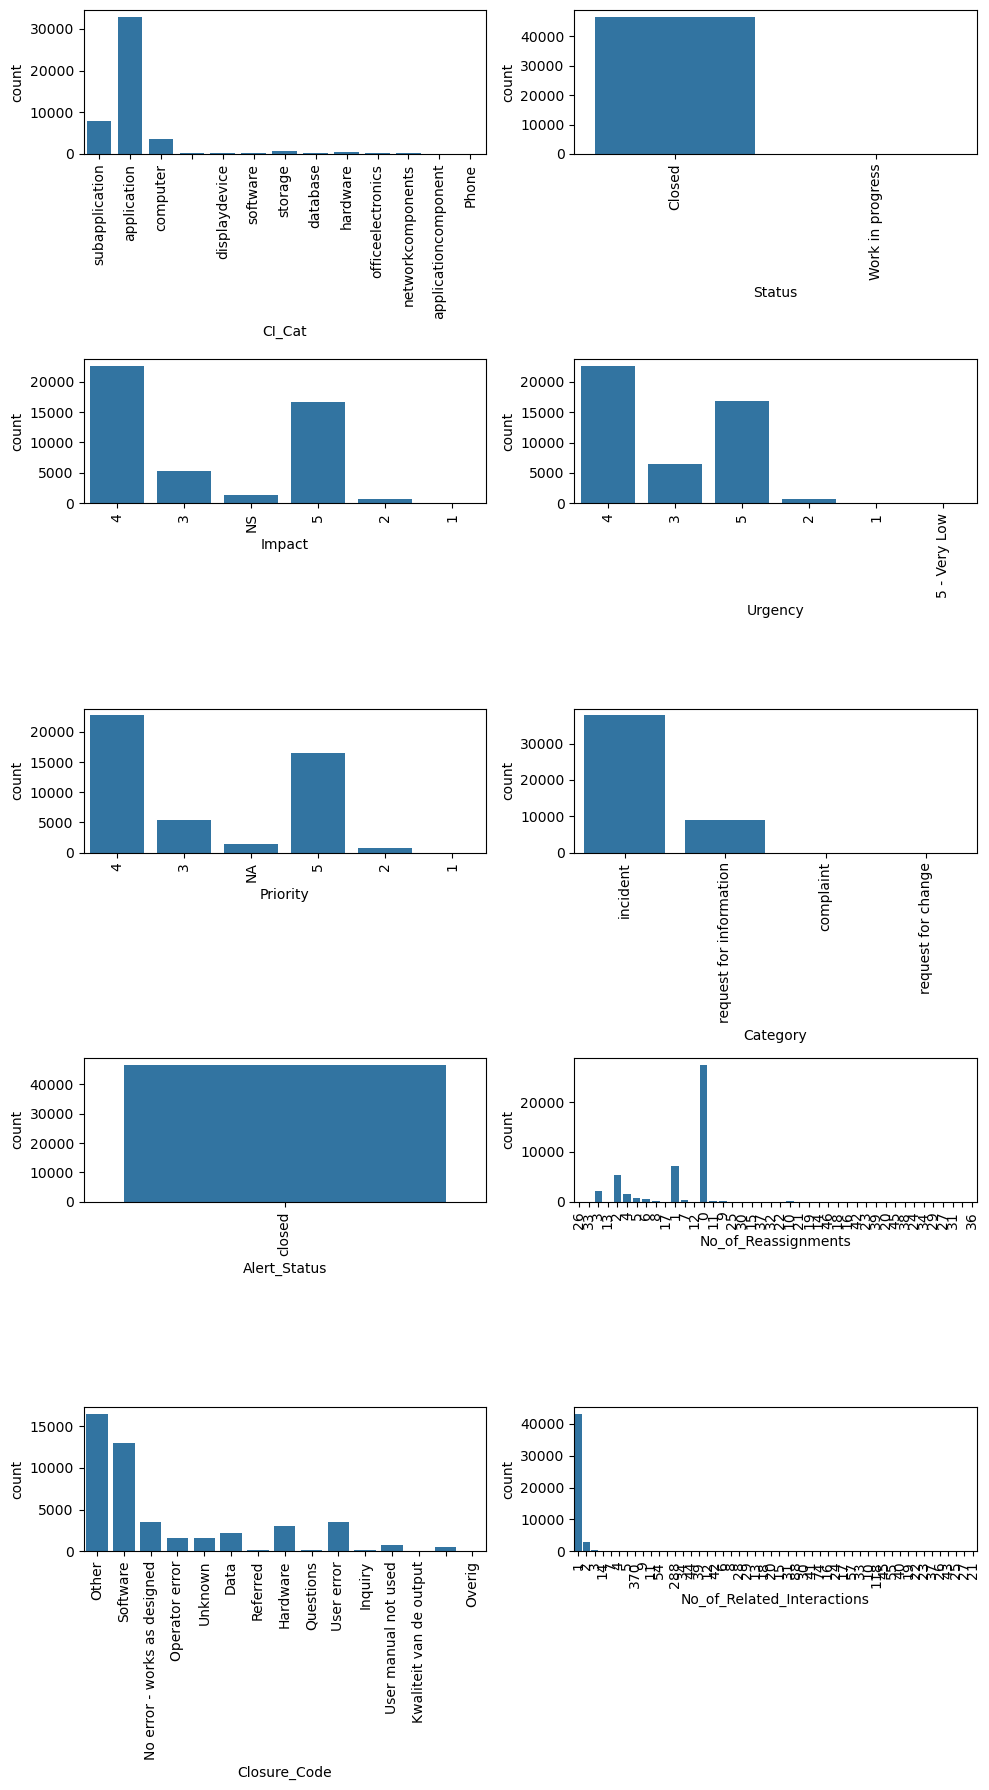

In [21]:
## ALl  columns Distribution
pl_no=1
plt.figure(figsize=(10,18))
for i in [column for column in data.columns if column not in exclude_columns]:

  plt.subplot(5,2,pl_no)
  sns.countplot(x=i,data=data)
  plt.xlabel(i)
  plt.xticks(rotation=90)
  pl_no+=1
plt.tight_layout()

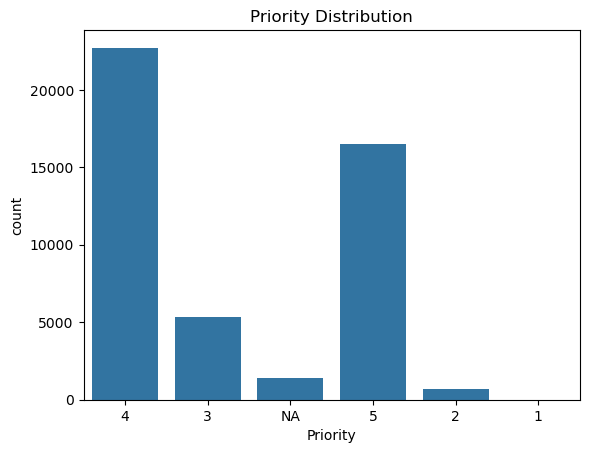

In [22]:
# Count plot for target variable (e.g., Class)
sns.countplot(x=data['Priority'], data=data)  # Replace 'class' with your target column #x=data['class']
plt.title('Priority Distribution')
plt.show()

## 📌 Univariate Analysis

### 1️⃣ Distribution of Numerical Columns (int or float)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (int or float)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram & KDE for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data[col], kde=True, bins=30, color='royalblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


## 2️⃣ Count Plot for Categorical Columns (object)

CI_Name: 3019 unique values
CI_Cat: 13 unique values
CI_Subcat: 65 unique values
WBS: 274 unique values
Incident_ID: 46606 unique values
Status: 2 unique values
Impact: 6 unique values
Urgency: 6 unique values
Priority: 6 unique values
number_cnt: 46606 unique values
Category: 4 unique values
KB_number: 1825 unique values
Alert_Status: 1 unique values
No_of_Reassignments: 42 unique values
Open_Time: 34636 unique values
Reopen_Time: 2245 unique values
Resolved_Time: 33628 unique values
Close_Time: 34528 unique values
Handle_Time_hrs: 30639 unique values
Closure_Code: 15 unique values
No_of_Related_Interactions: 50 unique values
Related_Interaction: 43060 unique values
No_of_Related_Incidents: 25 unique values
No_of_Related_Changes: 5 unique values
Related_Change: 233 unique values


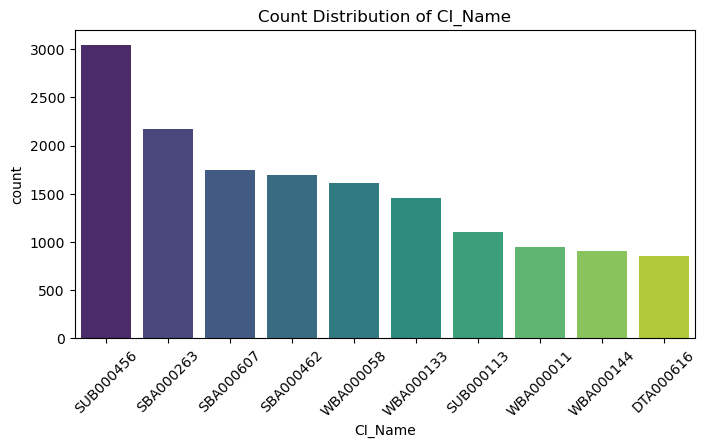

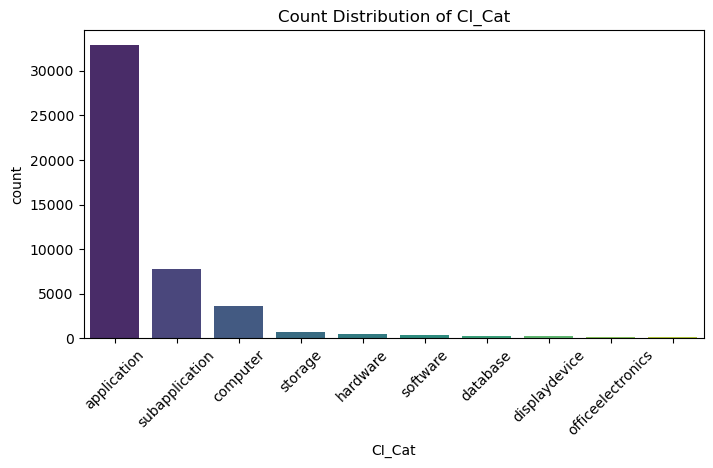

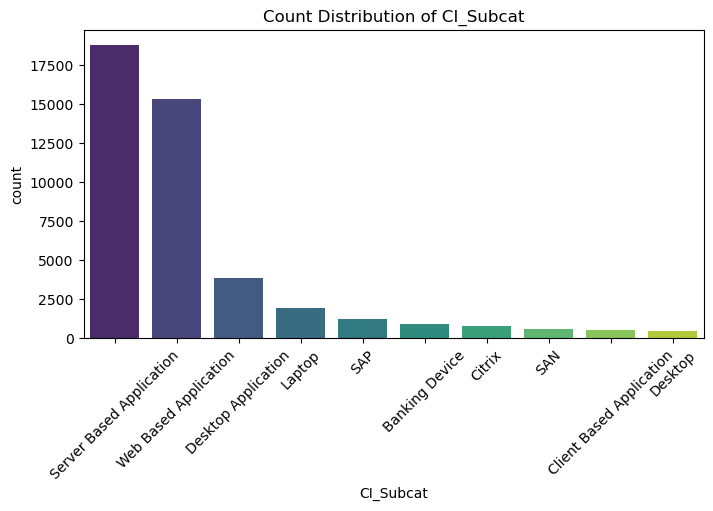

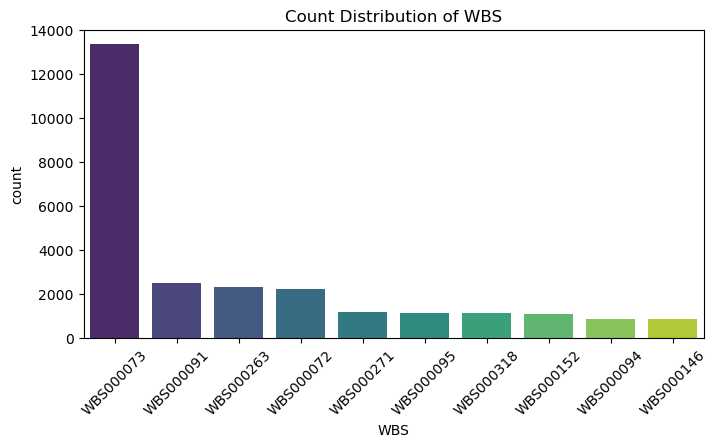

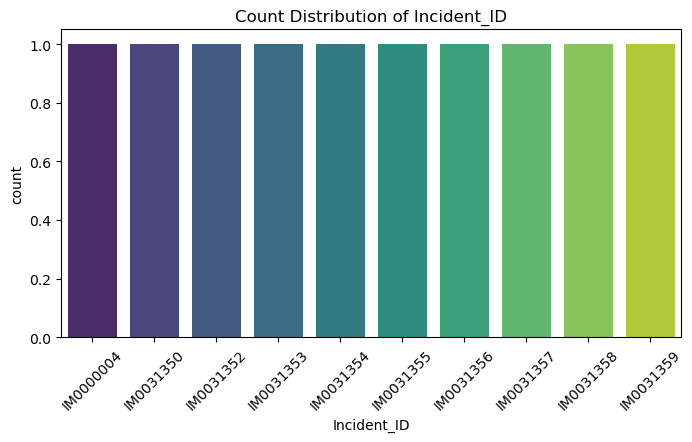

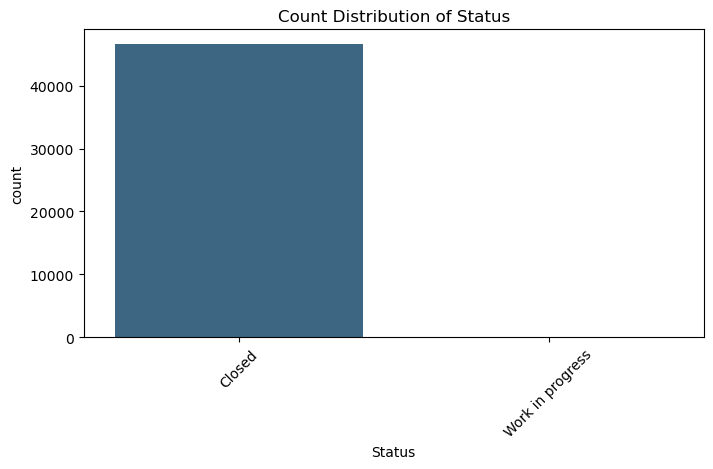

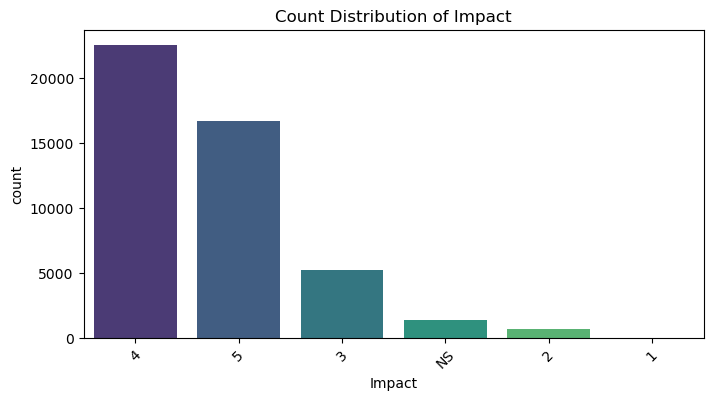

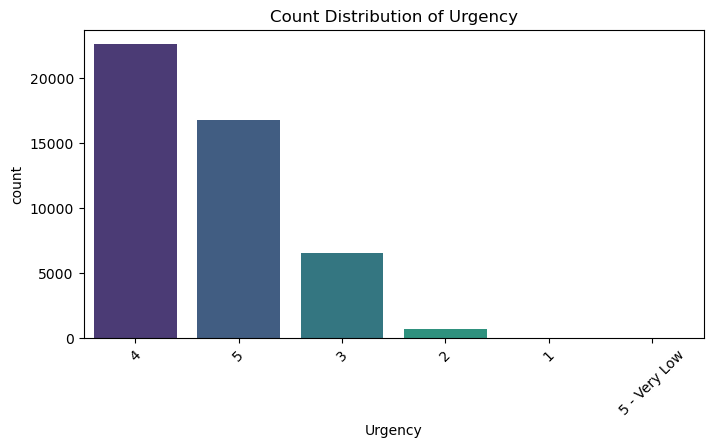

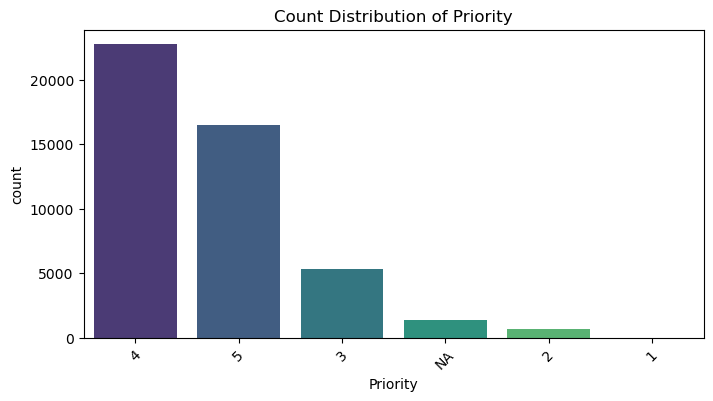

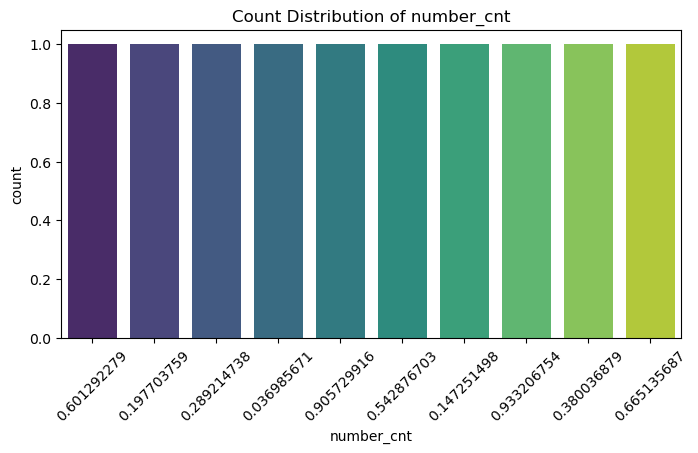

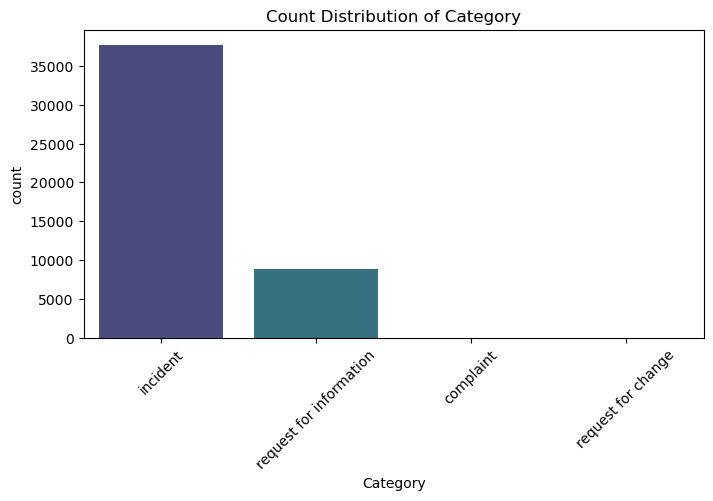

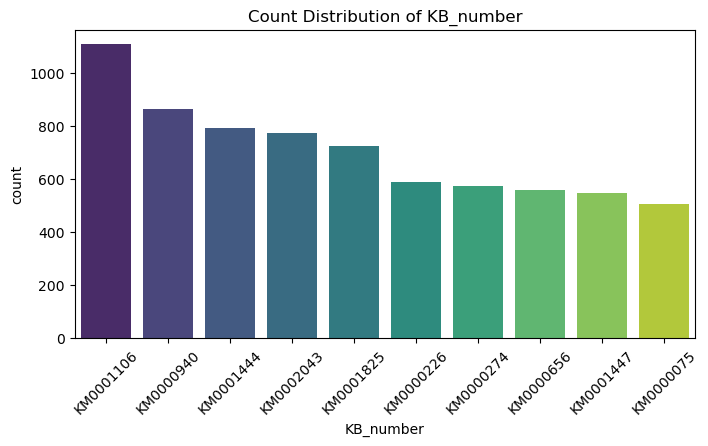

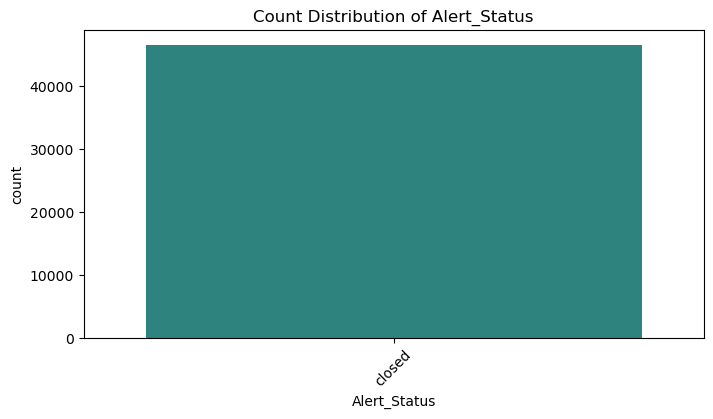

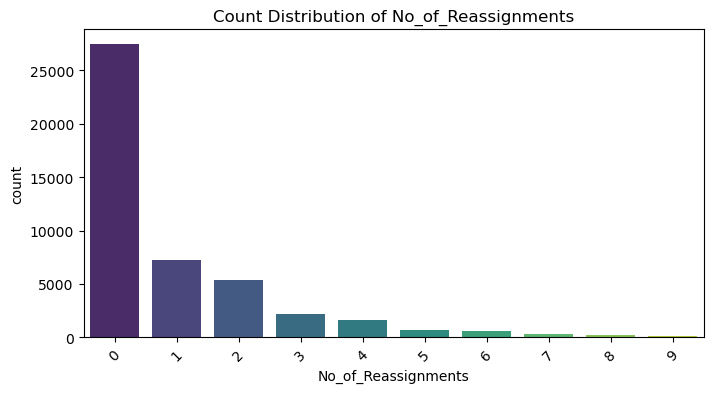

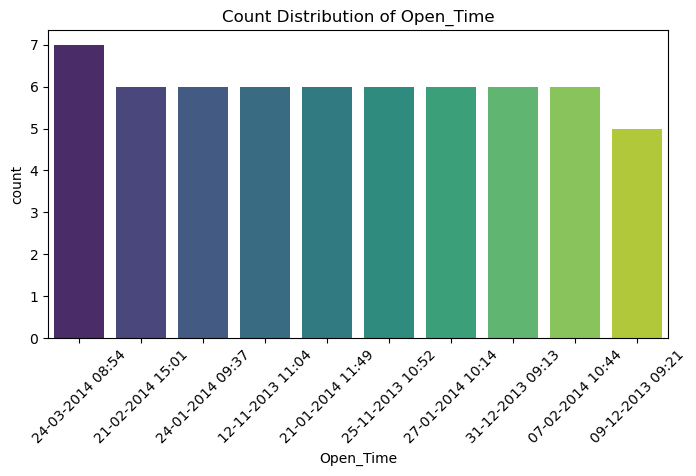

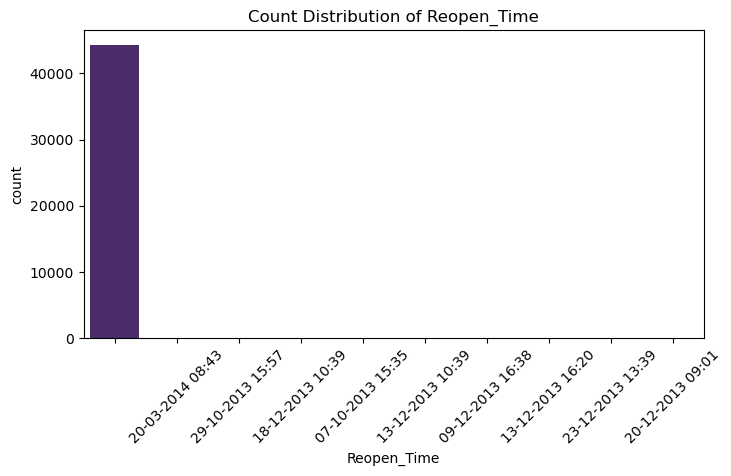

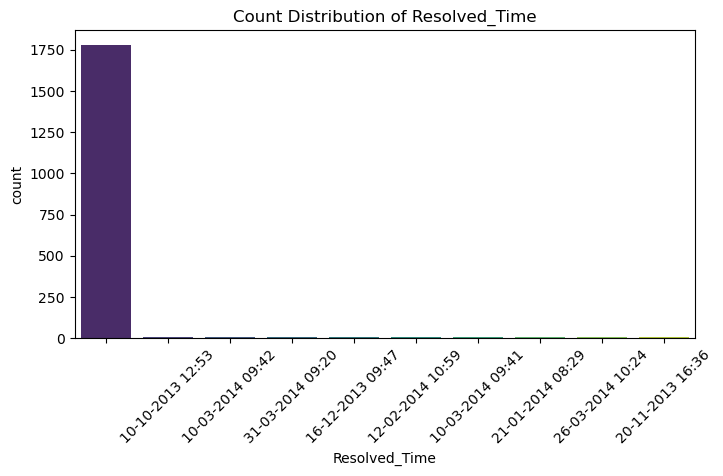

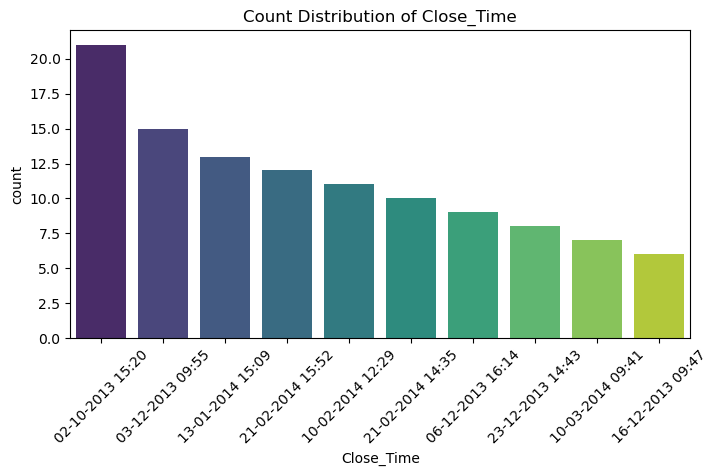

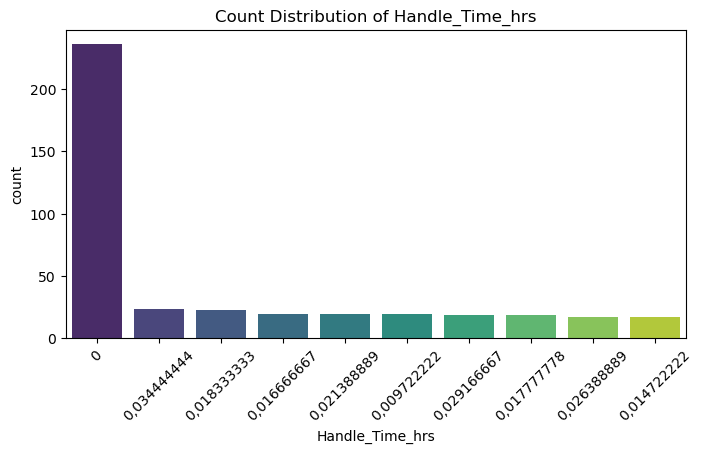

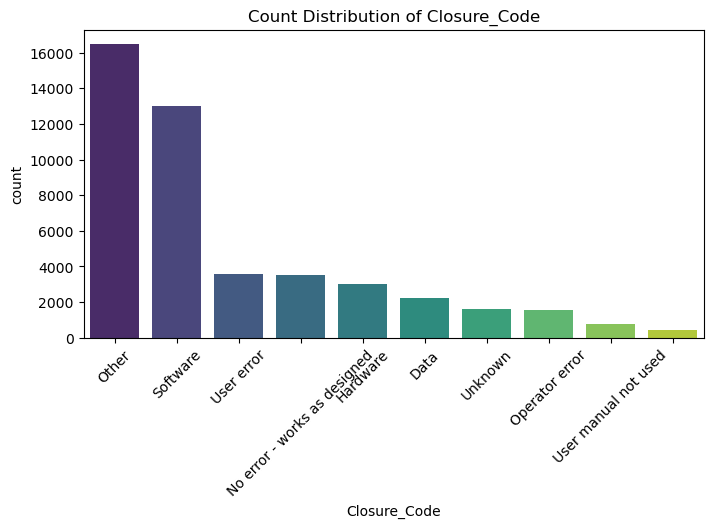

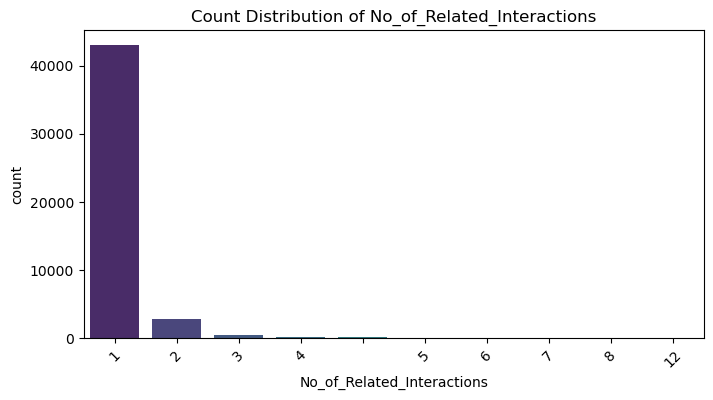

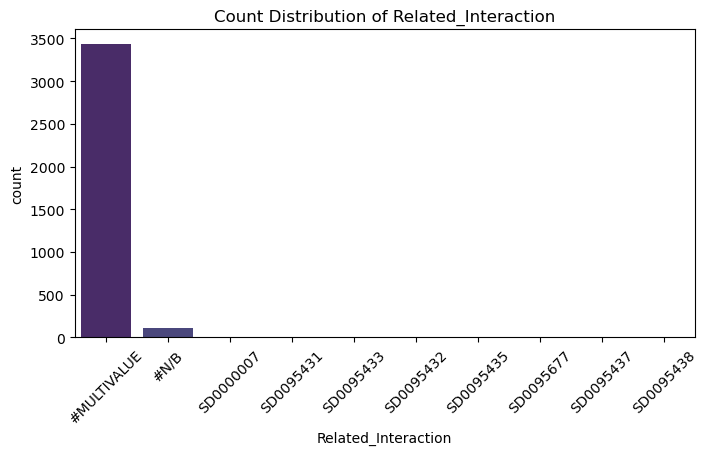

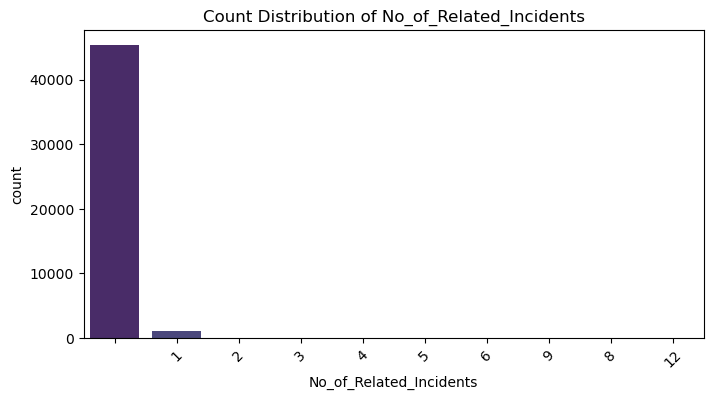

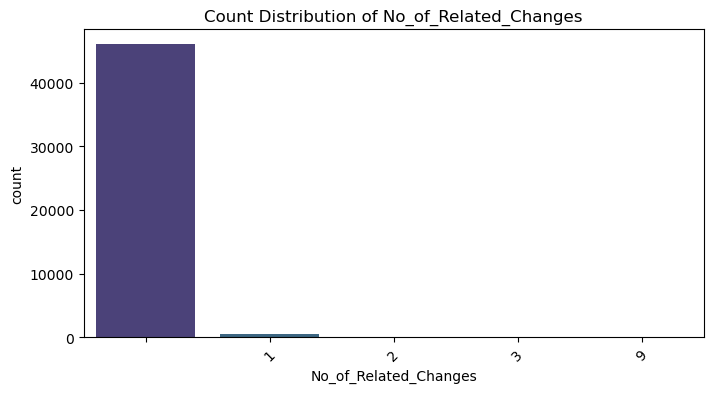

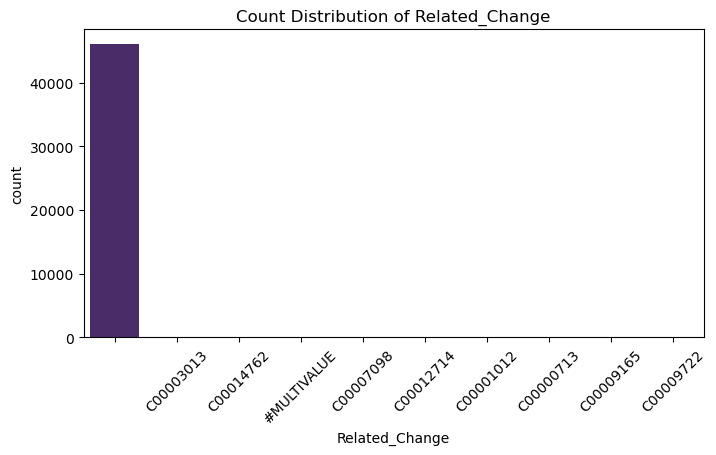

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select categorical columns (object)
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

# Check unique values
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

# Plot count distribution
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette="viridis", order=data[col].value_counts().index[:10])  # Limit to top 10 categories
    plt.title(f'Count Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📌 Bivariate Analysis

## 1️⃣ Boxplot for Numerical Columns vs. Categorical Columns

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x="Priority", y=col, palette="coolwarm")  # Replace "Priority" with any categorical column
    plt.title(f"{col} vs. Priority")
    plt.show()


# Converting Datetime Format

In [26]:
# Convert columns to datetime format
data['Open_Time'] = pd.to_datetime(data['Open_Time'], errors='coerce')
data['Close_Time'] = pd.to_datetime(data['Close_Time'], errors='coerce')
data['Resolved_Time'] = pd.to_datetime(data['Resolved_Time'], errors='coerce')
data['Reopen_Time'] = pd.to_datetime(data['Reopen_Time'], errors='coerce')
# Check if conversion was successful
print(data[['Open_Time', 'Close_Time', 'Resolved_Time','Reopen_Time']].dtypes)


Open_Time        datetime64[ns]
Close_Time       datetime64[ns]
Resolved_Time    datetime64[ns]
Reopen_Time      datetime64[ns]
dtype: object


In [27]:
print(data['Open_Time'].describe())  # Check min, max, mean
print(data['Open_Time'].head(10))   # See sample values
print(data['Close_Time'].describe())  # Check min, max, mean
print(data['Close_Time'].head(10))   # See sample values
print(data['Resolved_Time'].describe())  # Check min, max, mean
print(data['Resolved_Time'].head(10))   # See sample values


count                            18612
mean     2013-12-10 03:34:32.927143680
min                2012-01-10 10:49:00
25%                2013-06-11 11:40:45
50%                2013-11-12 13:00:30
75%                2014-06-02 18:22:30
max                2014-12-03 22:58:00
Name: Open_Time, dtype: object
0   2012-05-02 13:32:00
1   2012-12-03 15:44:00
2                   NaT
3                   NaT
4   2012-10-08 11:01:00
5   2012-10-08 11:27:00
6                   NaT
7                   NaT
8                   NaT
9   2012-03-09 16:04:00
Name: Open_Time, dtype: datetime64[ns]
count                            18333
mean     2013-12-15 14:00:49.795450880
min                2013-01-10 06:45:00
25%                2013-06-11 13:59:00
50%                2013-12-11 07:53:00
75%                2014-06-03 14:27:00
max                2014-12-03 17:56:00
Name: Close_Time, dtype: object
0   2013-04-11 13:51:00
1   2013-02-12 12:36:00
2                   NaT
3                   NaT
4   2013-08-11 1

## Data Preprocessing column by column

## ML algorithms will work well if first undertood the data well, so im doing this way to understand the data well to preprocess the wellpreprocessing the data column by column for better cleaning of datain the preprocessing the stages follwing these steps

## * Null value imputation*
## * Label encoding*
## * Force typecating*
## * Dropping the unnessesory columnsand other required preprocessing steps*

# Data Preprocessing / Feature Engineering

# Finding Null values 

In [28]:
 na_values=["", "NaT", "NA", "NULL",'NaN', "#N/A"]

# Check standard missing values (Pandas default)
print("Missing values detected by Pandas:\n", data.isnull().sum())

# Check how many values were originally one of the specified missing values
custom_missing_counts = {}
for col in data.columns:
    custom_missing_counts[col] = data[col].isin(["", "NaT", "NA", "NULL",'NaN', "#N/A"]).sum()

print("\nCustom missing value counts:\n", pd.Series(custom_missing_counts))


Missing values detected by Pandas:
 CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                     27994
Reopen_Time                   45735
Resolved_Time                 29029
Close_Time                    28273
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents           0
No_of_Related_Changes             0
Related_Change                    0
dtype: int64

Custom missing value counts:
 CI_Name             

In [29]:
# Count empty strings in each column
empty_string_counts = (data == "").sum()
print("Empty string count per column:\n", empty_string_counts)


Empty string count per column:
 CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                       0
Resolved_Time                     0
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64


In [30]:
import numpy as np

data.replace("", np.nan, inplace=True)

# Verify changes
print(data.isnull().sum())  # Check missing values again


CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                     27994
Reopen_Time                   45735
Resolved_Time                 29029
Close_Time                    28273
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64


## 🔹 Analysis of CI_Name Column
### The CI_Name column represents Configuration Items (CIs), which are systems, devices, or software components related to IT incidents.

### From your analysis, we see:
#### 1️⃣ There are 46,606 total incidents (count: 46606).
#### 2️⃣ There are 3,019 unique CIs (unique: 3019).
#### 3️⃣ The most common CI is SUB000456, which appears 3,050 times (top: SUB000456, freq: 3050).
#### 4️⃣ Some CIs appear only once (e.g., LAP001572, CBD000266).

In [31]:
print(data['CI_Name'].value_counts())
print(data['CI_Name'].isnull().sum())
print(data['CI_Name'].info())
print(data['CI_Name'].describe())

CI_Name
SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
             ... 
LAP001572       1
LAP000809       1
LAP000513       1
CBD000266       1
SWT000008       1
Name: count, Length: 3019, dtype: int64
0
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: CI_Name
Non-Null Count  Dtype 
--------------  ----- 
46606 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count         46606
unique         3019
top       SUB000456
freq           3050
Name: CI_Name, dtype: object


### ✅ Step 1: Handle Missing Values (If Any)

In [32]:
# Although your CI_Name has no null values now, if there were missing values in the future, you should handle them by filling with the mode (most frequent value).
# Fill missing values with the most frequent value (mode)
data['CI_Name'].fillna(data['CI_Name'].mode()[0], inplace=True)


### ✅ Step 2: Encode CI_Name (Convert Categorical to Numeric)

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['CI_Name'] = encoder.fit_transform(data['CI_Name'])


### ✅ Step 3: Verify the Changes

In [34]:
print(data['CI_Name'].head())# Should now contain numbers instead of text
print(data['CI_Name'].value_counts())
print(data['CI_Name'].dtypes)  # Verify if CI_Name is now numeric


0    2741
1    2863
2     990
3    2863
4    2863
Name: CI_Name, dtype: int32
CI_Name
2725    3050
2376    2176
2487    1743
2454    1698
2834    1614
        ... 
1904       1
1509       1
1341       1
55         1
2760       1
Name: count, Length: 3019, dtype: int64
int32


## 🔹 Analysis of CI_Cat Column
#### Your CI_Cat column contains 12 unique categories with some missing values (NaN).

## Total records: 46606
#### Non-null values: 46495 (so there are 111 missing values).
#### Most common category (mode): "application" (32,900 occurrences).


In [35]:
print(data['CI_Cat'].value_counts())
print(data['CI_Cat'].isnull().sum())
print(data['CI_Cat'].info())
print(data['CI_Cat'].describe())

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
111
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: CI_Cat
Non-Null Count  Dtype 
--------------  ----- 
46495 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count           46495
unique             12
top       application
freq            32900
Name: CI_Cat, dtype: object


### ✅ Step 1: Handle Missing Values in CI_Cat

In [36]:
# Fill missing values with the mode (most frequent category)
data['CI_Cat'].fillna(data['CI_Cat'].mode()[0], inplace=True)

# Verify if missing values are handled
print("Missing values in CI_Cat after filling:", data['CI_Cat'].isnull().sum())  # Should print 0


Missing values in CI_Cat after filling: 0


### ✅ Step 2: Convert CI_Cat to Numeric (Encoding)

In [37]:
# 🔹 Option 1: Label Encoding (Simple & Good for Tree-Based Models)
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply Label Encoding to CI_Cat
data['CI_Cat'] = encoder.fit_transform(data['CI_Cat'])

# Verify encoding
print(data[['CI_Cat']].head())


   CI_Cat
0      11
1       1
2       1
3       1
4       1


### ✅ Step 3: Verify the Changes

In [38]:
print(data['CI_Cat'].head())# Should now contain numbers instead of text
print(data['CI_Cat'].value_counts())
print(data['CI_Cat'].dtypes)  # Verify if CI_Name is now numeric


0    11
1     1
2     1
3     1
4     1
Name: CI_Cat, dtype: int32
CI_Cat
1     33011
11     7782
3      3643
10      703
6       442
9       333
4       214
5       212
8       152
7       107
2         5
0         2
Name: count, dtype: int64
int32


## 📌 Analysis of CI_Subcat Column
### You analyzed the CI_Subcat column, and here’s what we found:

### 1️⃣ Total records in dataset → 46606
### 2️⃣ Non-null values in CI_Subcat → 46495 (meaning 111 missing values)
### 3️⃣ Number of unique categories → 64 different subcategories
### 4️⃣ Most common value (top) → "Server Based Application" (appears 18811 times)

In [39]:
print(data['CI_Subcat'].value_counts())
print(data['CI_Subcat'].isnull().sum())
print(data['CI_Subcat'].info())
print(data['CI_Subcat'].describe())

CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: count, Length: 64, dtype: int64
111
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: CI_Subcat
Non-Null Count  Dtype 
--------------  ----- 
46495 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count                        46495
unique                          64
top       Server Based Application
freq                         18811
Name: CI_Subcat, dtype: object


### ✅ Step 1: Handle Missing (NaN) Values in CI_Subcat

In [40]:
data['CI_Subcat'].fillna(data['CI_Subcat'].mode()[0], inplace=True)


### ✅ Step 2: Encode CI_Subcat (Convert Categorical to Numerical)

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['CI_Subcat'] = encoder.fit_transform(data['CI_Subcat'])


### ✅ Step 3: Verify Changes

In [42]:
print(data['CI_Subcat'].head(10))  # Check first 10 rows
print(data['CI_Subcat'].isnull().sum())# Confirm missing values are handled
print(data['CI_Subcat'].value_counts())
print(data['CI_Subcat'].dtypes)


0    57
1    57
2    10
3    57
4    57
5    57
6    57
7    57
8    57
9    57
Name: CI_Subcat, dtype: int32
0
CI_Subcat
45    18922
57    15311
10     3876
21     1921
42     1199
      ...  
55        1
0         1
33        1
38        1
44        1
Name: count, Length: 64, dtype: int64
int32


## 🔹 Analysis of WBS Column
### Your WBS column:
#### ✔ Has 46,606 entries (no missing values).
#### ✔ Contains 274 unique values (categorical).
#### ✔ The most frequent value is WBS000073, appearing 13,342 times.
#### ✔ Data type is object (categorical), which needs encoding for ML models.

In [43]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,2741,11,57,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1,SD0000007,2,NaN,NaN
1,2863,1,57,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1,SD0000011,1,NaN,NaN
2,990,1,10,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,NaT,NaT,NaT,"4,84,31,19,444",No error - works as designed,1,SD0000017,NaN,NaN,NaN
3,2863,1,57,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,NaT,NaT,NaT,"4,32,18,33,333",Operator error,1,SD0000025,NaN,NaN,NaN
4,2863,1,57,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1,SD0000029,NaN,NaN,NaN


## Extracting last 3 values EX=WBS4454173=  173

In [44]:
data['WBS']=data['WBS'].apply(lambda x: x[-3:]) 

In [45]:
data['WBS']=data['WBS'].astype(int)

In [46]:
print(data['WBS'].value_counts())
print(data['WBS'].isnull().sum())
print(data['WBS'].info())
print(data['WBS'].describe())

WBS
73     13342
91      2500
263     2283
72      2197
271     1186
       ...  
214        1
119        1
117        1
282        1
105        1
Name: count, Length: 274, dtype: int64
0
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: WBS
Non-Null Count  Dtype
--------------  -----
46606 non-null  int32
dtypes: int32(1)
memory usage: 182.2 KB
None
count    46606.000000
mean       132.188002
std         85.329861
min          1.000000
25%         73.000000
50%         91.000000
75%        197.000000
max        339.000000
Name: WBS, dtype: float64


### ✅ Step 1: Handle Missing Values (If Any)


In [47]:
print(data['WBS'].isnull().sum())  # Confirm missing values


0


### ✅ Step 2: Verify Changes¶

In [48]:
print(data['WBS'].head(10))  # Check first 10 rows
print(data['WBS'].isnull().sum())# Confirm missing values are handled
print(data['WBS'].value_counts())
print(data['WBS'].dtypes)


0    162
1     88
2     92
3     88
4     88
5     88
6     55
7     88
8     88
9     55
Name: WBS, dtype: int32
0
WBS
73     13342
91      2500
263     2283
72      2197
271     1186
       ...  
214        1
119        1
117        1
282        1
105        1
Name: count, Length: 274, dtype: int64
int32


##  📌 Analysis of Your Incident_ID Column
#### Your Incident_ID column contains 46,606 unique values.
#### Each value appears only once (freq = 1), meaning it's a unique identifier (like a serial number).
#### The data type is object, so it's currently stored as text.
#### There are no missing (NaN) values (46606 non-null), so no need for missing value handling.

In [49]:
print(data['Incident_ID'].value_counts())
print(data['Incident_ID'].isnull().sum())
print(data['Incident_ID'].info())
print(data['Incident_ID'].describe())

Incident_ID
IM0000004    1
IM0031350    1
IM0031352    1
IM0031353    1
IM0031354    1
            ..
IM0015747    1
IM0015748    1
IM0015749    1
IM0015750    1
IM0047057    1
Name: count, Length: 46606, dtype: int64
0
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: Incident_ID
Non-Null Count  Dtype 
--------------  ----- 
46606 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count         46606
unique        46606
top       IM0000004
freq              1
Name: Incident_ID, dtype: object


### ✅ Step 1: Should You Encode Incident_ID?
#### Since Incident_ID is a unique identifier, you should NOT use Label Encoding or One-Hot Encoding.
### 📌 Why?
#### Encoding ID numbers is not meaningful because it does not add useful information for analysis.
#### Instead, use Incident_ID for indexing or remove it if it's not needed.


### ✅ Step 2: Handling Null Values (If Any)

In [50]:
data['Incident_ID'].fillna("Unknown", inplace=True)  # If null values exist


### ✅ Step 3: Encoding Other Categorical Columns

In [51]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Incident_ID'] = encoder.fit_transform(data['Incident_ID'])


### ✅ Step 4: Verify Changes

In [52]:
print(data['Incident_ID'].head(10))  # Check first 10 rows
print(data['Incident_ID'].isnull().sum())# Confirm missing values are handled
print(data['Incident_ID'].value_counts())
print(data['Incident_ID'].dtypes)


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Incident_ID, dtype: int32
0
Incident_ID
0        1
31063    1
31065    1
31066    1
31067    1
        ..
15537    1
15538    1
15539    1
15540    1
46605    1
Name: count, Length: 46606, dtype: int64
int32


## 🔹 Analysis of Your Status Column
#### Your Status column has 46,606 entries with only two unique values:
#### "Closed" → 46,597 occurrences
#### "Work in progress" → 9 occurrences
#### Also, Status has no null values (46606 non-null), so you do not need to handle missing values.
### ✅ Next Steps:
### 1️⃣ Encode Status into numerical values (since ML models can’t process text).
### 2️⃣ Since Status is binary, we can use Label Encoding or One-Hot Encoding.

In [53]:
print(data['Status'].value_counts())
print(data['Status'].isnull().sum())
print(data['Status'].info())
print(data['Status'].describe())

Status
Closed              46597
Work in progress        9
Name: count, dtype: int64
0
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: Status
Non-Null Count  Dtype 
--------------  ----- 
46606 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count      46606
unique         2
top       Closed
freq       46597
Name: Status, dtype: object


### ✅ Step 1:Handling Missing Values
### Also, Status has no null values (46606 non-null), so you do not need to handle missing values.

### ✅ Step 2: Encode Status Using Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Status'] = encoder.fit_transform(data['Status'])


### ✅ Step 3: 🔹 Verify Encoding

In [55]:
print(data['Status'].head(10))  # Check first 10 rows
print(data['Status'].isnull().sum())# Confirm missing values are handled
print(data['Status'].value_counts())
print(data['Status'].dtypes)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Status, dtype: int32
0
Status
0    46597
1        9
Name: count, dtype: int64
int32


# 📌 Analyzing Your Impact Column
## Your Impact column has 46606 non-null values and 6 unique categories:
## ✅ No missing (NaN) values were detected, but "NS" (Not Specified) is a category that might need special handling.
## ✅ dtype: object means it's stored as text, so we need to convert it into numbers (encoding).

In [56]:
print(data['Impact'].value_counts())
print(data['Impact'].isnull().sum())
print(data['Impact'].info())
print(data['Impact'].describe())

Impact
4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64
0
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: Impact
Non-Null Count  Dtype 
--------------  ----- 
46606 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count     46606
unique        6
top           4
freq      22556
Name: Impact, dtype: object


## ✅ Step 1: Handle "NS" Category
### Since "NS" (Not Specified) is not a number, we need to decide how to handle it.
### 🔹 Option 1: Replace "NS" with the Most Frequent Value (Mode)

In [57]:
data.loc[data['Impact']=='NS','Impact']=data['Impact'].mode()[0]

In [58]:
data.loc[data['Impact']=='NS']

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change


## ✅ Step 2: Convert Impact to Numeric Format
### Now that "NS" is handled, convert the column to numbers:

In [59]:
data['Impact'] = data['Impact'].astype(int)


## ✅ Step 4: Verify the Changes
### Check if everything is correct

In [60]:
print(data['Impact'].unique())  # Should not contain "NS"
print(data['Impact'].dtype)  # Should be int
print(data['Impact'].isnull().sum())  # Should be 0


[4 3 5 2 1]
int32
0


## 📌 Analyzing Your Urgency Column
###  Your Urgency column has some issues:
#### ✅ No missing (NaN) values (46606 non-null).
#### ✅ Data type is object, meaning some values are not purely numeric.
#### ✅ Unique values include both numbers and text (e.g., "5 - Very Low").

In [61]:
print(data['Urgency'].value_counts())
print(data['Urgency'].isnull().sum())
print(data['Urgency'].info())
print(data['Urgency'].describe())

Urgency
4               22588
5               16779
3                6536
2                 696
1                   6
5 - Very Low        1
Name: count, dtype: int64
0
<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: Urgency
Non-Null Count  Dtype 
--------------  ----- 
46606 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB
None
count     46606
unique        6
top           4
freq      22588
Name: Urgency, dtype: object


### ✅ Step 1: Standardize Urgency Values
#### Since Urgency should be purely numerical, clean up any non-numeric values.
#### 🔹 Convert Urgency to Numeric (Fix Text Issues)

### 🔹 Final Cleaned Urgency Column
#### ✅ All values are now integers.
#### ✅ Text parts are removed.
#### ✅ Handles missing values properly.

In [62]:
data.drop(data.loc[data['Urgency']=='5 - Very Low'].index,axis=0,inplace=True)

### ✅ Step 2: Handle Missing Values 

In [63]:
data['Urgency'].fillna(data['Urgency'].mode()[0], inplace=True)


### ✅ Step 3: Encode Urgency

In [64]:
data['Urgency']=data['Urgency'].astype(int)

### ✅Step 4: Verify the Changes

In [65]:
print(data['Urgency'].unique())  # Should now contain only numbers
print(data['Urgency'].isnull().sum())  # Check for missing values
print(data['Urgency'].dtype)  # Should be int or float after conversion


[4 3 5 2 1]
0
int32


### 📌 Handling Missing Values and Encoding Category Column
#### Your Category column contains four unique values:
#### Incident (37,748 times)
#### Request for Information (8,846 times)
#### Complaint (11 times)
#### Request for Change (1 time)
#### Also, there are no null values (46606 non-null) in the Category column, so you don't need to fill missing values.

In [66]:
print(data['Category'].value_counts())
print(data['Category'].isnull().sum())
print(data['Category'].info())
print(data['Category'].describe())

Category
incident                   37748
request for information     8845
complaint                     11
request for change             1
Name: count, dtype: int64
0
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Category
Non-Null Count  Dtype 
--------------  ----- 
46605 non-null  object
dtypes: object(1)
memory usage: 728.2+ KB
None
count        46605
unique           4
top       incident
freq         37748
Name: Category, dtype: object


###  ✅ Step 1: Check Again for Any Hidden Missing Values

In [67]:
print(data['Category'].value_counts(dropna=False))  # Show if hidden missing values exist


Category
incident                   37748
request for information     8845
complaint                     11
request for change             1
Name: count, dtype: int64


In [68]:
data['Category'].replace(["", "NULL", "NaN"], "incident", inplace=True)


### ✅ Step 2: Encode Category from Categorical to Numeric

In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])

print(data['Category'].head(10))  # Check the mapping

# 📌 This assigns numbers:

# "incident" → 0
# "request for information" → 1
# "complaint" → 2
# "request for change" → 3



0    1
1    1
2    3
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Category, dtype: int32


### ✅ Step 3: Verify Changes

In [70]:
print(data['Category'].unique())  # Should now contain only numbers
print(data['Category'].isnull().sum())  # Check for missing values
print(data['Category'].dtype)  # Should be int or float after conversion

[1 3 0 2]
0
int32


### 🔹 Analysis of Your KB_number Column
#### Your column KB_number contains categorical values representing Knowledge Base (KB) references. Let's analyze the data:
#### 1️⃣ There are 46,606 entries, and no missing values (46606 non-null).
#### 2️⃣ It has 1,825 unique values (some KB numbers appear frequently).
#### 3️⃣ Most common value is "KM0001106" with 1,106 occurrences.
#### 4️⃣ Data type is object, so we need to encode it into numerical values.

In [71]:
print(data['KB_number'].value_counts())
print(data['KB_number'].isnull().sum())
print(data['KB_number'].info())
print(data['KB_number'].describe())

KB_number
KM0001106    1106
KM0000940     864
KM0001444     790
KM0002043     773
KM0001825     725
             ... 
KM0001159       1
KM0001760       1
KM0001788       1
KM0001795       1
KM0001578       1
Name: count, Length: 1824, dtype: int64
0
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: KB_number
Non-Null Count  Dtype 
--------------  ----- 
46605 non-null  object
dtypes: object(1)
memory usage: 728.2+ KB
None
count         46605
unique         1824
top       KM0001106
freq           1106
Name: KB_number, dtype: object


## Extracting the value 

In [72]:
## Extracted last 4 numbers KB123456=3456
data['KB_number'] = data['KB_number'].apply(lambda x: x[-4:])


### ✅ Step 1: Handle Missing Values 
#### Even though Pandas shows 46606 non-null, let’s double-check if any KB numbers are missing ("" or "NULL"):

In [73]:
print(data['KB_number'].isnull().sum())  # Check NaN values
print((data['KB_number'] == "").sum())  # Check empty strings


0
0


### ✅ Step 2: Encode KB_number (Convert to Numeric)
#### Since KB_number is categorical, we have encoding:
### 🔹  Label Encoding (Simple & Efficient)
#### Use this if KB numbers have no specific meaning.

In [74]:
data['KB_number']=data['KB_number'].astype(int)

### ✅ Step 3: Verify Encoding

In [75]:
print(data['KB_number'].unique())  # Should now contain only numbers
print(data['KB_number'].isnull().sum())  # Check for missing values
print(data['KB_number'].dtype)  # Should be int or float after conversion

[ 553  611  339 ... 1052  378 1578]
0
int32


### 🔹 Analyzing the Alert_Status Column
#### Your Alert_Status column has only one unique value (closed) across all 46,606 entries:
#### This means every row has the same value (closed), and there's no variation in the data.

In [76]:
print(data['Alert_Status'].value_counts())
print(data['Alert_Status'].isnull().sum())
print(data['Alert_Status'].info())
print(data['Alert_Status'].describe())

Alert_Status
closed    46605
Name: count, dtype: int64
0
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Alert_Status
Non-Null Count  Dtype 
--------------  ----- 
46605 non-null  object
dtypes: object(1)
memory usage: 728.2+ KB
None
count      46605
unique         1
top       closed
freq       46605
Name: Alert_Status, dtype: object


### ✅ Step 1: Check for Missing Values
#### You mentioned handling null values, so let's verify if there are any:

In [77]:
print(data['Alert_Status'].isnull().sum())  # Count missing values


0


### ✅ Step 2: Encoding Alert_Status (Categorical → Numerical)
#### Since Alert_Status has only one unique value (closed), encoding it is unnecessary. However, if you must convert it, you can use Label Encoding or One-Hot Encoding.
#### 🔹 Option 1: Label Encoding (Not Needed Here)

In [78]:
data.drop('Alert_Status',axis=1,inplace=True)

## 🔹 Analyzing the No_of_Reassignments Column

In [79]:
len(data['No_of_Reassignments'].unique())

42

In [80]:
data['No_of_Reassignments'].mode()

0    0
Name: No_of_Reassignments, dtype: object

In [81]:
data['No_of_Reassignments'].isnull().sum()

1

In [82]:
data.loc[data['No_of_Reassignments'].isnull(),'No_of_Reassignments']=data['No_of_Reassignments'].mode()[0]

In [83]:
data['No_of_Reassignments'].isnull().sum()

0

In [84]:
data['No_of_Reassignments']=data['No_of_Reassignments'].astype(int)

### ✅ Analyzing the Open_Time Column¶


In [85]:
print(data['Open_Time'].value_counts())
print(data['Open_Time'].isnull().sum())
print(data['Open_Time'].info())
print(data['Open_Time'].describe())

Open_Time
2013-12-11 11:04:00    6
2014-07-02 10:44:00    6
2013-04-12 13:02:00    5
2013-02-10 11:33:00    5
2013-01-10 09:42:00    5
                      ..
2013-02-12 15:36:00    1
2013-02-12 15:46:00    1
2013-02-12 15:50:00    1
2013-02-12 15:54:00    1
2014-12-03 17:43:00    1
Name: count, Length: 13613, dtype: int64
27993
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Open_Time
Non-Null Count  Dtype         
--------------  -----         
18612 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 728.2 KB
None
count                            18612
mean     2013-12-10 03:34:32.927143680
min                2012-01-10 10:49:00
25%                2013-06-11 11:40:45
50%                2013-11-12 13:00:30
75%                2014-06-02 18:22:30
max                2014-12-03 22:58:00
Name: Open_Time, dtype: object


In [86]:
data['Open_Time'] = pd.to_datetime(data['Open_Time'], errors='coerce')

### Step 1: Handling Null Values in Open_Time

In [87]:
data['Open_Time'].fillna(method='ffill', inplace=True)


In [88]:
print(data['Open_Time'].isnull().sum())

0


### 🔹 Step 4: Verify Data After Cleaning

In [89]:
print(data['Open_Time'].unique())  # Should now contain only numbers
print(data['Open_Time'].isnull().sum())  # Check for missing values
print(data['Open_Time'].dtype)  # Should be int or float after conversion

<DatetimeArray>
['2012-05-02 13:32:00', '2012-12-03 15:44:00', '2012-10-08 11:01:00',
 '2012-10-08 11:27:00', '2012-03-09 16:04:00', '2012-01-10 10:49:00',
 '2012-02-10 12:12:00', '2012-05-12 15:17:00', '2012-07-12 14:34:00',
 '2012-10-12 14:44:00',
 ...
 '2014-12-03 16:05:00', '2014-12-03 16:14:00', '2014-12-03 16:35:00',
 '2014-12-03 16:36:00', '2014-12-03 16:42:00', '2014-12-03 16:56:00',
 '2014-12-03 16:59:00', '2014-12-03 17:18:00', '2014-12-03 18:40:00',
 '2014-12-03 17:43:00']
Length: 13613, dtype: datetime64[ns]
0
datetime64[ns]


## 🔹 Analyzing the Reopen_Time Column
### Your Reopen_Time column has:
#### ✔ 871 non-null values out of 46,606 total records → Many missing (NaT) values.
#### ✔ Stored in datetime64[ns] format → Already converted correctly.
#### ✔ Some timestamps repeat → Some tickets were reopened multiple times.



In [90]:
print(data['Reopen_Time'].value_counts())
print(data['Reopen_Time'].isnull().sum())
print(data['Reopen_Time'].info())
print(data['Reopen_Time'].describe())

Reopen_Time
2013-09-12 16:50:00    2
2014-03-03 14:41:00    2
2013-08-10 09:37:00    2
2013-06-11 14:38:00    2
2013-07-10 15:35:00    2
                      ..
2013-08-11 08:38:00    1
2013-12-12 14:37:00    1
2013-03-12 14:14:00    1
2013-07-11 10:33:00    1
2014-12-03 15:19:00    1
Name: count, Length: 861, dtype: int64
45734
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Reopen_Time
Non-Null Count  Dtype         
--------------  -----         
871 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 728.2 KB
None
count                              871
mean     2013-12-11 16:45:50.493685504
min                2013-01-10 09:58:00
25%                2013-06-12 13:19:30
50%                2013-11-11 14:15:00
75%                2014-06-03 13:45:30
max                2014-12-03 17:24:00
Name: Reopen_Time, dtype: object


### ✅ Step 1: Handling Missing Values (NaT)
### Since Reopen_Time is a datetime column, there are different ways to handle missing values:

In [91]:
data['Reopen_Time']=pd.to_datetime(data['Reopen_Time'], errors='coerce')

In [92]:
data['Reopen_Time'].fillna(data['Reopen_Time'].mode()[0], inplace=True)


### 🔹 Step 4: Verify Data After Cleaning

In [93]:
print(data['Reopen_Time'].unique())  # Should now contain only numbers
print(data['Reopen_Time'].isnull().sum())  # Check for missing values
print(data['Reopen_Time'].dtype)

<DatetimeArray>
['2013-01-10 16:21:00', '2013-02-12 12:31:00', '2014-11-02 14:50:00',
 '2013-04-12 13:58:00', '2013-03-12 08:57:00', '2013-08-10 09:14:00',
 '2014-03-01 14:14:00', '2013-10-04 09:15:00', '2013-12-11 12:04:00',
 '2013-10-10 14:48:00',
 ...
 '2014-11-03 14:14:00', '2014-12-03 08:18:00', '2014-11-03 16:37:00',
 '2014-11-03 13:27:00', '2014-11-03 16:34:00', '2014-12-03 11:39:00',
 '2014-12-03 15:39:00', '2014-12-03 13:47:00', '2014-12-03 16:20:00',
 '2014-12-03 15:19:00']
Length: 861, dtype: datetime64[ns]
0
datetime64[ns]


## 🔹 Analyzing the Resolved_Time Column
### Your Resolved_Time column has:¶
### Your Resolved_Time column has 17,577 non-null values out of 46,606 total rows, meaning there are missing values (NaN) that need to be handled.

In [94]:
print(data['Resolved_Time'].value_counts())
print(data['Resolved_Time'].isnull().sum())
print(data['Resolved_Time'].info())
print(data['Resolved_Time'].describe())

Resolved_Time
2013-10-10 12:53:00    7
2013-06-11 05:12:00    6
2014-12-02 10:59:00    6
2014-10-03 09:42:00    6
2014-10-03 09:41:00    6
                      ..
2013-02-12 13:43:00    1
2013-02-12 11:17:00    1
2013-03-12 10:33:00    1
2013-02-12 11:59:00    1
2014-12-03 16:37:00    1
Name: count, Length: 13082, dtype: int64
29028
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Resolved_Time
Non-Null Count  Dtype         
--------------  -----         
17577 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 728.2 KB
None
count                            17577
mean     2013-12-16 11:14:11.138419200
min                2013-01-10 06:45:00
25%                2013-06-11 14:56:00
50%                2013-12-11 08:38:00
75%                2014-06-03 15:03:00
max                2014-12-03 17:56:00
Name: Resolved_Time, dtype: object


## #️⃣ 1️⃣ Fill with Previous (Forward Fill) or mode
#### If certain times appear frequently, use the most common timestamp

In [95]:
data['Resolved_Time']=pd.to_datetime(data['Resolved_Time'], errors='coerce')

In [96]:
data['Resolved_Time'].isnull().sum()

29028

In [97]:
data['Resolved_Time'].mode()[0]

Timestamp('2013-10-10 12:53:00')

In [98]:
data.loc[data['Resolved_Time'].isnull(),'Resolved_Time']=data['Resolved_Time'].mode()[0]

In [99]:
data['Resolved_Time'].isnull().sum()

0

## Analyzing the Close_Time Column
### Your Close_Time column has:¶
#### From your analysis:
#### Close_Time has 18,333 non-null values out of 46,606 rows → Many missing values (NaT) exist.
#### Since Close_Time is in datetime format, we need a logical strategy to fill missing values.


In [100]:
print(data['Close_Time'].value_counts())
print(data['Close_Time'].isnull().sum())
print(data['Close_Time'].info())
print(data['Close_Time'].describe())

Close_Time
2013-02-10 15:20:00    21
2013-03-12 09:55:00    15
2014-10-02 12:29:00    11
2013-06-12 16:14:00     9
2014-10-03 09:41:00     7
                       ..
2013-09-12 12:08:00     1
2013-04-12 08:09:00     1
2013-06-12 15:09:00     1
2013-02-12 15:20:00     1
2014-12-03 16:37:00     1
Name: count, Length: 13536, dtype: int64
28272
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Close_Time
Non-Null Count  Dtype         
--------------  -----         
18333 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 728.2 KB
None
count                            18333
mean     2013-12-15 14:00:49.795450880
min                2013-01-10 06:45:00
25%                2013-06-11 13:59:00
50%                2013-12-11 07:53:00
75%                2014-06-03 14:27:00
max                2014-12-03 17:56:00
Name: Close_Time, dtype: object


#### ✅ Step 1: Fill with Forward Fill (ffill)
#### If median isn’t ideal, we can fill missing values with the previous row's Close_Time.

In [101]:
data['Close_Time']=pd.to_datetime(data['Close_Time'], errors='coerce')
print(data['Close_Time'].isnull().sum())

28272


In [102]:
data['Close_Time'].fillna(method='ffill', inplace=True)
print(data['Close_Time'].isnull().sum())

0


## 🔹 Analysis of Your Handle_Time_hrs Column
### From your insights:
#### Handle_Time_hrs is already converted from milliseconds to hours (✅ Correct).
#### There is 1 null value (46606 total rows, but 46605 non-null entries).
#### Values range from 0 to 2.77 hours, with a mean of 0.67 hours (~40 minutes).


In [103]:
data.drop('Handle_Time_hrs',axis=1,inplace=True)

## 🔹 Analysis of Your Handle_Time_hrs Column

In [104]:
data['Handle_Time_hrs_conv']=abs(data['Close_Time']-data['Open_Time'])

In [105]:
a=[]
for i in data['Handle_Time_hrs_conv'].index:
    a.append((data['Handle_Time_hrs_conv'][i].total_seconds())/3600)

In [106]:
data['Handle_Time_hrs_conv']=a

In [107]:
print(data['Handle_Time_hrs_conv'].isnull().sum())

0


### 📌 Analyzing Your Closure_Code Column
#### You provided an analysis of the Closure_Code column, and here’s what I see:
### 1️⃣ Missing Values:
#### There are 46,606 total rows.
#### 46,146 non-null values → 460 missing values (NaN)
### 2️⃣ Categorical Distribution:
#### There are 14 unique categories (e.g., "Other", "Software", "User error").
#### "Other" is the most common category (16,470 times).

In [108]:
print(data['Closure_Code'].value_counts())
print(data['Closure_Code'].isnull().sum())
print(data['Closure_Code'].info())
print(data['Closure_Code'].describe())

Closure_Code
Other                           16470
Software                        13027
User error                       3554
No error - works as designed     3529
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64
460
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Closure_Code
Non-Null Count  Dtype 
--------------  ----- 
46145 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB
None
count     46145
unique       14
top       Other
freq      16470
Name: Closure_Code, dtype: object


### ✅ Step 1: Handle Missing Values (NaN)
#### Since "Other" is the most frequent category, we can fill missing values with "Other" using:

In [109]:
print(data['Closure_Code'].isnull().sum())

460


In [110]:
data['Closure_Code'].fillna("Other", inplace=True)
print(data['Closure_Code'].isnull().sum())

0


### ✅ Step 2: Encode Closure_Code (Categorical → Numeric)
#### Since Closure_Code is categorical, we need to convert it into numbers.
#### There are two main encoding methods:
### 1️⃣ Label Encoding (Best for Machine Learning)

In [111]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Closure_Code'] = encoder.fit_transform(data['Closure_Code'])


### ✅ Step 3: Verify the Changes

In [112]:
print(data['Closure_Code'].unique())  # Should now contain only numbers
print(data['Closure_Code'].isnull().sum())  # Check for missing values
print(data['Closure_Code'].dtype)

[ 6 10  4  5 11  0  9  1  8 12  2 13  3  7]
0
int32


## 📌 Analysis of No_of_Related_Interaction Column

In [113]:
data['No_of_Related_Interactions'].isnull().sum()

114

In [114]:
len(data['No_of_Related_Interactions'].unique())

50

In [115]:
data['No_of_Related_Interactions'].mode()

0    1
Name: No_of_Related_Interactions, dtype: object

In [116]:
data.loc[data['No_of_Related_Interactions'].isnull(),'No_of_Related_Interactions']=data['No_of_Related_Interactions'].mode()[0]

In [117]:
data['No_of_Related_Interactions'].isnull().sum()

0

In [118]:
data['No_of_Related_Interactions']=data['No_of_Related_Interactions'].astype(int)

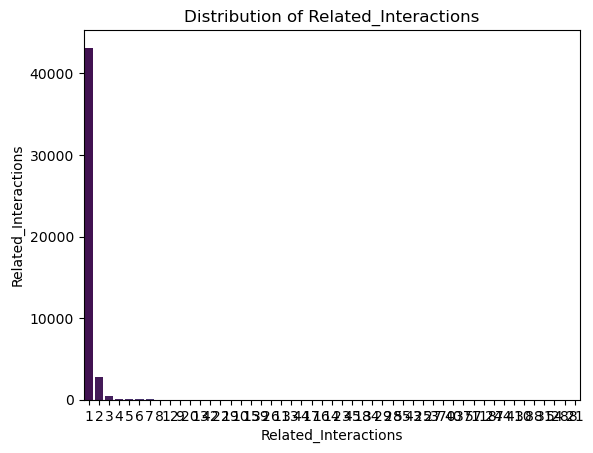

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['No_of_Related_Interactions'], order=data['No_of_Related_Interactions'].value_counts().index, palette="viridis")
plt.title("Distribution of Related_Interactions")
plt.xlabel("Related_Interactions")
plt.ylabel("Related_Interactions")
plt.show()

## 📌 Analysis of Related_Interaction Column
#### From your output, here’s what we observe:
#### ✔ No Null Values: The column has 46606 non-null values (so no NaN values).
#### ✔ Categorical Data: It contains text values (object dtype).
#### ✔ Unique Values: 43,060 unique values, meaning some values repeat.
#### ✔ Frequent Values:
#### MULTIVALUE appears 3,434 times (most common value).
#### N/B appears 114 times (likely "Not Available").

In [120]:
print(data['Related_Interaction'].value_counts())
print(data['Related_Interaction'].isnull().sum())
print(data['Related_Interaction'].info())
print(data['Related_Interaction'].describe())

Related_Interaction
#MULTIVALUE    3434
#N/B            114
SD0000007         1
SD0095431         1
SD0095433         1
               ... 
SD0045635         1
SD0045617         1
SD0045636         1
SD0045637         1
SD0147088         1
Name: count, Length: 43059, dtype: int64
0
<class 'pandas.core.series.Series'>
Index: 46605 entries, 0 to 46605
Series name: Related_Interaction
Non-Null Count  Dtype 
--------------  ----- 
46605 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB
None
count           46605
unique          43059
top       #MULTIVALUE
freq             3434
Name: Related_Interaction, dtype: object


In [121]:
data.drop('Related_Interaction',axis=1,inplace=True)

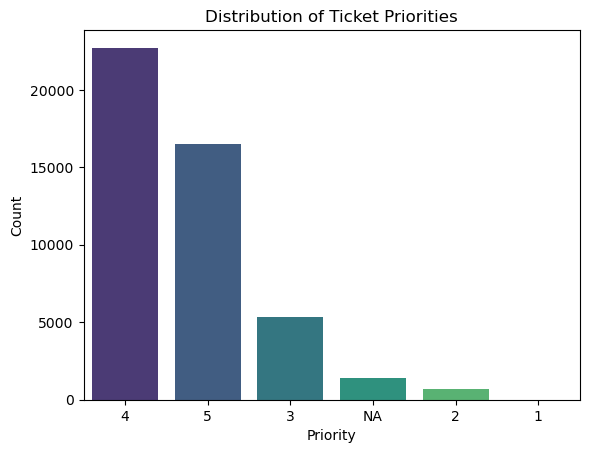

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['Priority'], order=data['Priority'].value_counts().index, palette="viridis")
plt.title("Distribution of Ticket Priorities")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()


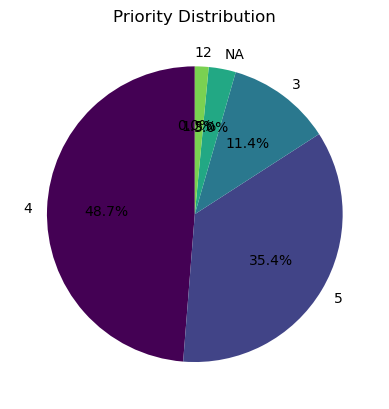

In [123]:
data['Priority'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
plt.title("Priority Distribution")
plt.ylabel("")
plt.show()


### ✅ Option 1: Fill With Most Frequent Priority (Mode)
### Since Priority 4 is the most common, replace missing values with 4.0:

### ✅ Option 1: Fill With Most Frequent Priority (Mode)

In [124]:
data['Priority'].unique()

array(['4', '3', 'NA', '5', '2', '1'], dtype=object)

In [125]:
data['Priority'].value_counts()

Priority
4     22717
5     16485
3      5323
NA     1380
2       697
1         3
Name: count, dtype: int64

In [126]:
data['Priority'].mode()

0    4
Name: Priority, dtype: object

In [127]:
data.loc[data['Priority']=='NA','Priority']=data['Priority'].mode()[0]

In [128]:
data['Priority'].isna().sum()


0

In [129]:
print(data['Priority'].nunique())  # Count unique values
print(data['Priority'].unique())   # Show unique values


5
['4' '3' '5' '2' '1']


In [130]:
data['Priority']=data['Priority'].astype(int)

In [131]:
# or use median
data['Priority'] = data['Priority'].fillna(data['Priority'].median()).astype(int)
print(data['Priority'].isna().sum())

0


In [132]:
print(data['Priority'].nunique())  # Count unique values
print(data['Priority'].unique())   # Show unique values


5
[4 3 5 2 1]


In [133]:
print(data['Priority'].dtype)


int32


In [134]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change',
       'Handle_Time_hrs_conv'],
      dtype='object')

In [135]:
data.shape

(46605, 23)

## Droping unwanted columns 

In [136]:
data.drop(columns=['CI_Name', 'Incident_ID', 'Reopen_Time', 'Closure_Code', 
                   'No_of_Related_Changes', 'Related_Change'], axis=1, inplace=True)


In [137]:
data.drop('No_of_Related_Incidents',axis=1,inplace=True)

In [138]:
print(data.columns)
print(data.shape)

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'KB_number', 'No_of_Reassignments',
       'Open_Time', 'Resolved_Time', 'Close_Time',
       'No_of_Related_Interactions', 'Handle_Time_hrs_conv'],
      dtype='object')
(46605, 16)


## Checking for the outliers

<Axes: >

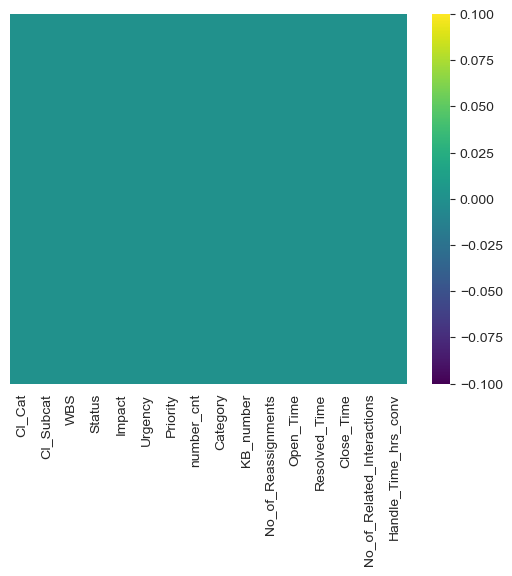

In [139]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

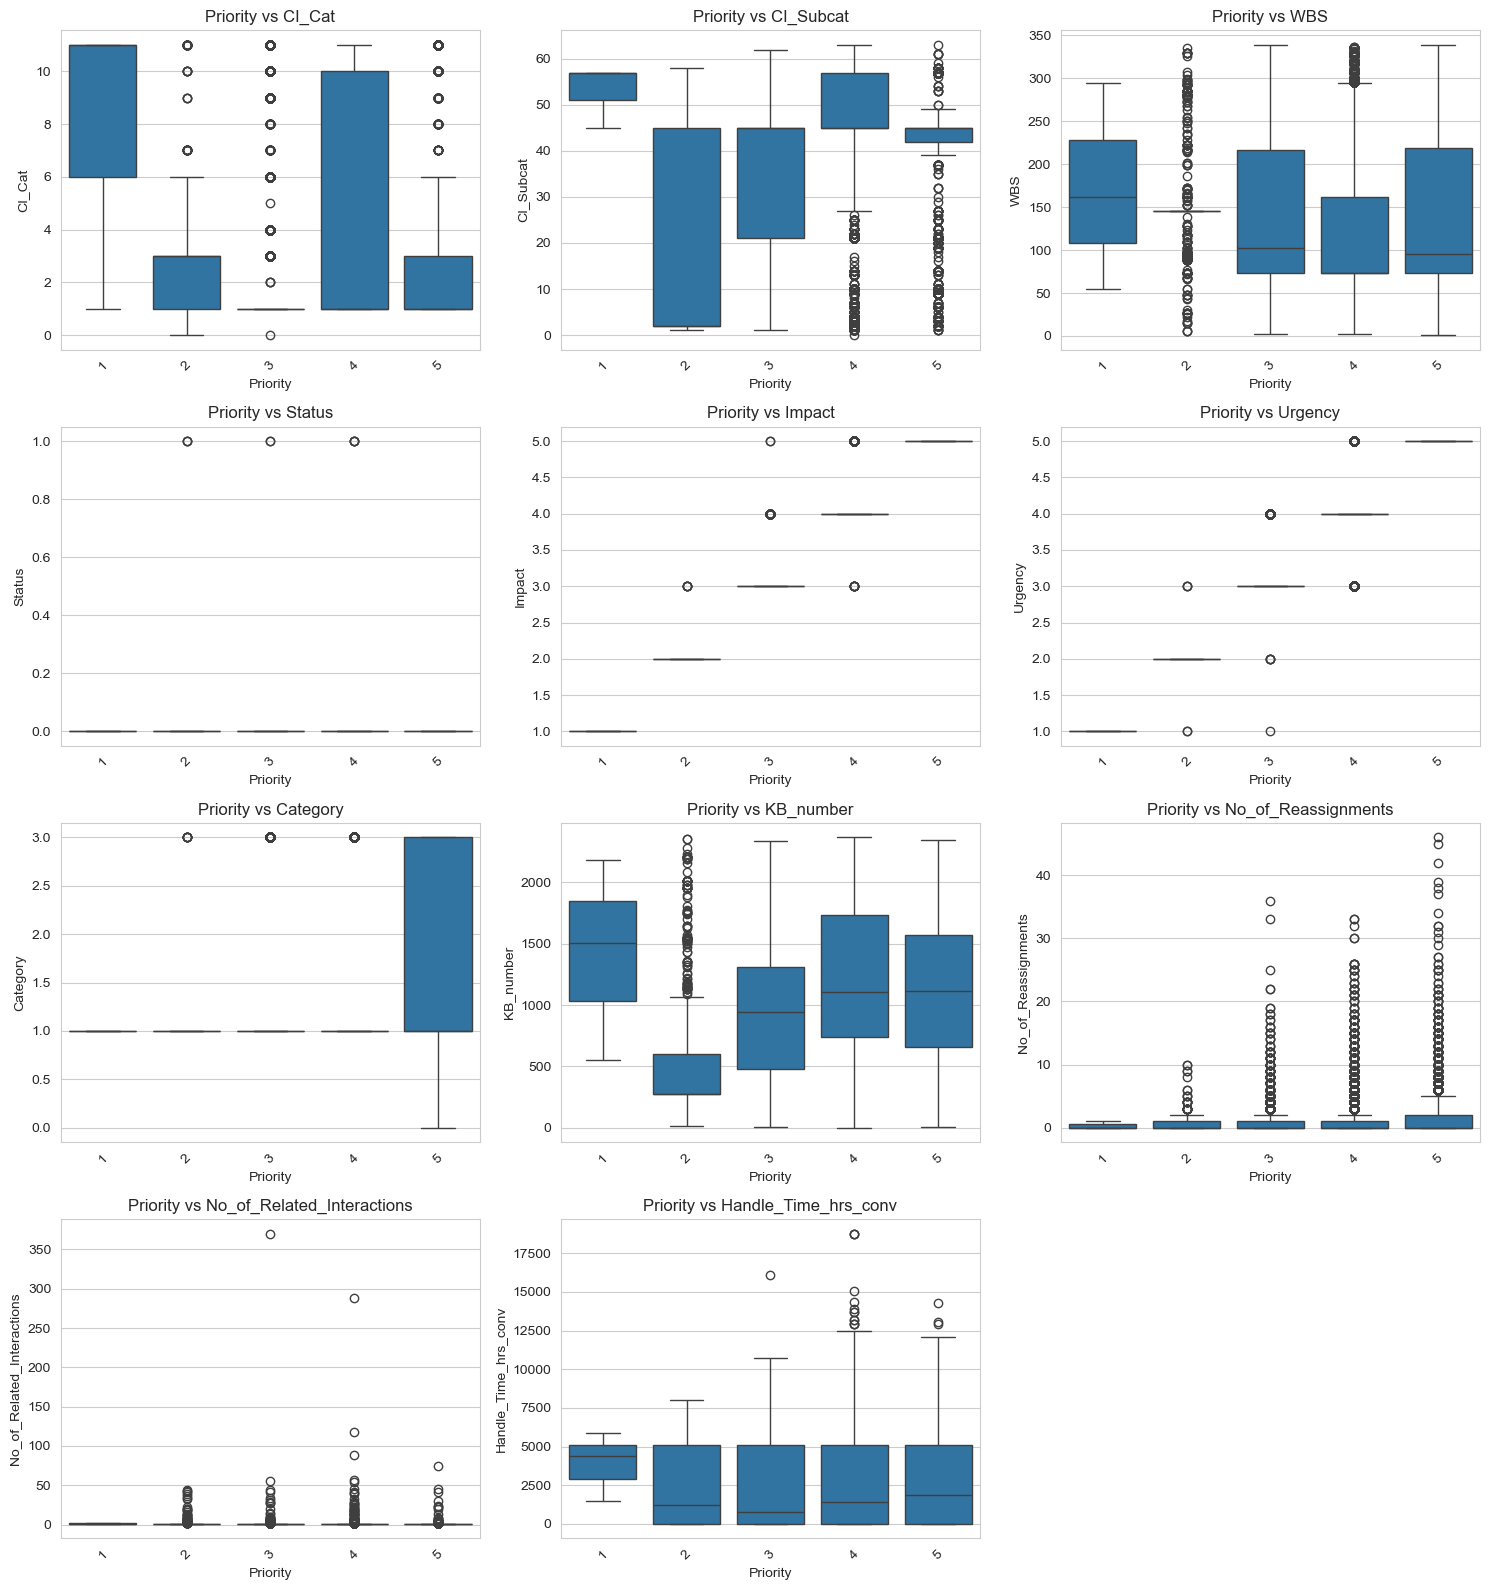

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select numerical columns except 'Priority'
num_cols = data.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if col != 'Priority']

# Dynamically set the number of rows & columns for the grid
num_plots = len(num_cols)
rows = math.ceil(num_plots / 3)  # Adjust row count based on number of features

plt.figure(figsize=(15, rows * 4))  # Adjust figure size dynamically

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)  # Automatically set rows based on number of features
    sns.boxplot(x=data['Priority'], y=data[col], data=data)
    plt.title(f"Priority vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()  # Prevent overlap
plt.show()


In [141]:
cor = data.select_dtypes(include=['int', 'float']).corr()
cor

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
CI_Cat,1.000000,0.199088,-0.218036,-0.000489,-0.053631,-0.048209,-0.051441,-0.105496,-0.103949,-0.087452,-0.012491,-0.025572
CI_Subcat,0.199088,1.000000,-0.125487,-0.032448,0.073395,0.095685,0.082222,0.030186,0.008108,0.027463,-0.013018,-0.018097
WBS,-0.218036,-0.125487,1.000000,0.002249,0.036953,0.023461,0.033532,0.118807,0.031387,0.078837,-0.008296,0.012922
Status,-0.000489,-0.032448,0.002249,1.000000,-0.022083,-0.022811,-0.021929,-0.006720,-0.019018,0.001234,-0.000814,0.000332
Impact,-0.053631,0.073395,0.036953,-0.022083,1.000000,0.953838,0.991777,0.478703,0.080164,0.088300,-0.018948,0.046353
Urgency,-0.048209,0.095685,0.023461,-0.022811,0.953838,1.000000,0.962713,0.470558,0.076083,0.090767,-0.022842,0.046952
Priority,-0.051441,0.082222,0.033532,-0.021929,0.991777,0.962713,1.000000,0.476697,0.077562,0.088218,-0.023668,0.046484
Category,-0.105496,0.030186,0.118807,-0.006720,0.478703,0.470558,0.476697,1.000000,-0.010322,0.077133,-0.008888,0.016483
KB_number,-0.103949,0.008108,0.031387,-0.019018,0.080164,0.076083,0.077562,-0.010322,1.000000,-0.029289,0.002674,-0.008551
No_of_Reassignments,-0.087452,0.027463,0.078837,0.001234,0.088300,0.090767,0.088218,0.077133,-0.029289,1.000000,0.036764,0.082228


In [142]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'KB_number', 'No_of_Reassignments',
       'Open_Time', 'Resolved_Time', 'Close_Time',
       'No_of_Related_Interactions', 'Handle_Time_hrs_conv'],
      dtype='object')

In [ ]:
import pandas as pd
import sweetviz

# Select only the required columns
selected_columns = [
    'CI_Cat', 'CI_Subcat', 'WBS', 'Status', 'Impact', 'Urgency', 'Priority',
    'number_cnt', 'Category', 'KB_number', 'No_of_Reassignments',
    'Open_Time', 'Resolved_Time', 'Close_Time',
    'No_of_Related_Interactions', 'Handle_Time_hrs_conv'
]

# Ensure selected columns exist in the DataFrame
available_cols = list(set(data.columns) & set(selected_columns))

# Filter dataset
univariate = data[available_cols]

# Generate Sweetviz Report
sv = sweetviz.analyze(univariate)
sv.show_html("sweetviz_report.html")  # This will save the report as an HTML file

print("Sweetviz report generated: sweetviz_report.html")


In [144]:
null_df=pd.DataFrame((data.isnull().sum()/len(data))*100,columns=['per'])
null_df['count']=data.isnull().sum()
null_df

,per,count
CI_Cat,0.0,0
CI_Subcat,0.0,0
WBS,0.0,0
Status,0.0,0
Impact,0.0,0
Urgency,0.0,0
Priority,0.0,0
number_cnt,0.0,0
Category,0.0,0
KB_number,0.0,0


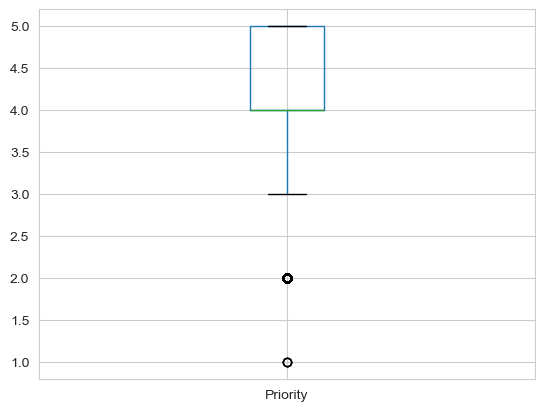

In [145]:
data[['Priority']].boxplot();

In [146]:
 data['Priority'].value_counts() ## target variable is imbalenced

Priority
4    24097
5    16485
3     5323
2      697
1        3
Name: count, dtype: int64

# Task 1

## Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

In [147]:
data1=data.copy()

In [148]:
data1.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
No_of_Related_Interactions    0
Handle_Time_hrs_conv          0
dtype: int64

In [149]:
data1=data1.drop(['Open_Time','Resolved_Time','Close_Time'],axis=1)

In [150]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int32  
 1   CI_Subcat                   46605 non-null  int32  
 2   WBS                         46605 non-null  int32  
 3   Status                      46605 non-null  int32  
 4   Impact                      46605 non-null  int32  
 5   Urgency                     46605 non-null  int32  
 6   Priority                    46605 non-null  int32  
 7   number_cnt                  46605 non-null  object 
 8   Category                    46605 non-null  int32  
 9   KB_number                   46605 non-null  int32  
 10  No_of_Reassignments         46605 non-null  int32  
 11  No_of_Related_Interactions  46605 non-null  int32  
 12  Handle_Time_hrs_conv        46605 non-null  float64
dtypes: float64(1), int32(11), object(1)


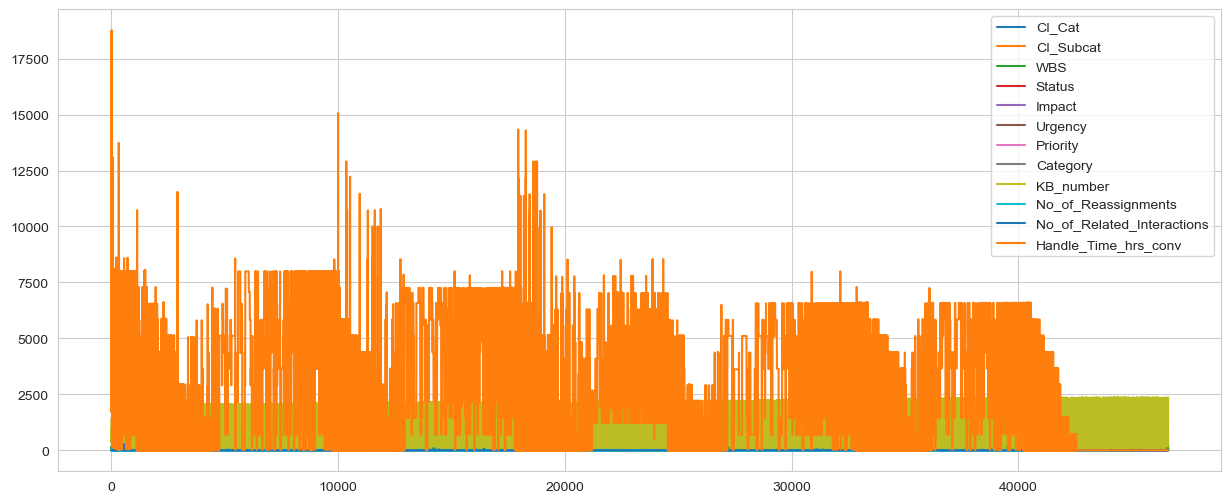

In [151]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

# Scaling the data

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [153]:
X=data1.drop(['Priority','Urgency'],axis=1)

In [154]:
y=data1['Priority'].map({1:1,2:1,3:0,4:0,5:0})

In [155]:
y.value_counts()

Priority
0    45905
1      700
Name: count, dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32623, 11)
(13982, 11)
(32623,)
(13982,)


In [158]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [159]:
print(X_train.isnull().sum())


CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Impact                        0
number_cnt                    0
Category                      0
KB_number                     0
No_of_Reassignments           0
No_of_Related_Interactions    0
Handle_Time_hrs_conv          0
dtype: int64


In [160]:
print("Checking NaN values in X_train:", X_train.isna().sum().sum())
print("Checking NaN values in y_train:", y_train.isna().sum())
print("Checking Inf values in X_train:", np.isinf(X_train.select_dtypes(include=[np.number])).sum().sum())


Checking NaN values in X_train: 0
Checking NaN values in y_train: 0
Checking Inf values in X_train: 0


In [161]:
X_train_np = X_train.to_numpy(dtype=np.float64)  # Convert to numeric NumPy array
y_train_np = y_train.to_numpy(dtype=np.float64)

print("Checking NaN values in X_train:", np.isnan(X_train_np).sum())
print("Checking NaN values in y_train:", np.isnan(y_train_np).sum())
print("Checking Inf values in X_train:", np.isinf(X_train_np).sum())


Checking NaN values in X_train: 0
Checking NaN values in y_train: 0
Checking Inf values in X_train: 0


# Model Implimentation

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model_RF = RandomForestClassifier(random_state=42)

# Train model
model_RF.fit(X_train, y_train)

# Predictions on Train and Test Data
y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test)

# Evaluate on Train Data
print("===== Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_RF))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_RF))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_RF))

# Evaluate on Test Data
print("\n===== Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_RF))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_RF))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_RF))

# Check class distribution in test data
print("\n===== Test Data Class Distribution =====")
print(y_test.value_counts())


===== Train Data Metrics =====
Train Accuracy: 1.0
Train Confusion Matrix:
 [[32133     0]
 [    0   490]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       1.00      1.00      1.00       490

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Test Data Metrics =====
Test Accuracy: 0.9998569589472178
Test Confusion Matrix:
 [[13772     0]
 [    2   208]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      1.00       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982


===== Test Data Class Distribution =====
Priority
0    1377

In [163]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (32623, 11)
X_test shape: (13982, 11)
y_train shape: (32623,)
y_test shape: (13982,)


In [164]:
print(y_train.value_counts())
print(y_test.value_counts())


Priority
0    32133
1      490
Name: count, dtype: int64
Priority
0    13772
1      210
Name: count, dtype: int64


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)

# Predictions (Use Scaled Data)
y_train_pred_LR = model_LR.predict(X_train_scaled)
y_test_pred_LR = model_LR.predict(X_test_scaled)

# Evaluate on Train Data
print("===== Logistic Regression - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_LR))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_LR))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_LR))

# Evaluate on Test Data
print("\n===== Logistic Regression - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_LR))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_LR))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_LR))


===== Logistic Regression - Train Data Metrics =====
Train Accuracy: 0.9999080403396376
Train Confusion Matrix:
 [[32133     0]
 [    3   487]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       1.00      0.99      1.00       490

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Logistic Regression - Test Data Metrics =====
Test Accuracy: 0.9998569589472178
Test Confusion Matrix:
 [[13772     0]
 [    2   208]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      1.00       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [166]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model_DT = DecisionTreeClassifier()

# Train model
model_DT.fit(X_train, y_train)

# Predictions
y_train_pred_DT = model_DT.predict(X_train)
y_test_pred_DT = model_DT.predict(X_test)

# Evaluate on Train Data
print("===== Decision Tree - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_DT))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_DT))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_DT))

# Evaluate on Test Data
print("\n===== Decision Tree - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_DT))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_DT))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_DT))


===== Decision Tree - Train Data Metrics =====
Train Accuracy: 1.0
Train Confusion Matrix:
 [[32133     0]
 [    0   490]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       1.00      1.00      1.00       490

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Decision Tree - Test Data Metrics =====
Test Accuracy: 0.9997854384208268
Test Confusion Matrix:
 [[13771     1]
 [    2   208]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      0.99       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [167]:
from sklearn.ensemble import BaggingClassifier

# Initialize model
model_BC = BaggingClassifier()

# Train model
model_BC.fit(X_train, y_train)

# Predictions
y_train_pred_BC = model_BC.predict(X_train)
y_test_pred_BC = model_BC.predict(X_test)

# Evaluate on Train Data
print("===== Bagging Classifier - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_BC))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_BC))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_BC))

# Evaluate on Test Data
print("\n===== Bagging Classifier - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_BC))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_BC))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_BC))


===== Bagging Classifier - Train Data Metrics =====
Train Accuracy: 0.9999693467798793
Train Confusion Matrix:
 [[32133     0]
 [    1   489]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       1.00      1.00      1.00       490

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Bagging Classifier - Test Data Metrics =====
Test Accuracy: 0.9998569589472178
Test Confusion Matrix:
 [[13772     0]
 [    2   208]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      1.00       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [168]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
model_KNN = KNeighborsClassifier()

# Train model
model_KNN.fit(X_train, y_train)

# Predictions
y_train_pred_KNN = model_KNN.predict(X_train)
y_test_pred_KNN = model_KNN.predict(X_test)

# Evaluate on Train Data
print("===== KNN - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_KNN))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_KNN))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_KNN))

# Evaluate on Test Data
print("\n===== KNN - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_KNN))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_KNN))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_KNN))


===== KNN - Train Data Metrics =====
Train Accuracy: 0.9913251387058211
Train Confusion Matrix:
 [[32074    59]
 [  224   266]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     32133
           1       0.82      0.54      0.65       490

    accuracy                           0.99     32623
   macro avg       0.91      0.77      0.82     32623
weighted avg       0.99      0.99      0.99     32623


===== KNN - Test Data Metrics =====
Test Accuracy: 0.9886282363038192
Test Confusion Matrix:
 [[13730    42]
 [  117    93]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     13772
           1       0.69      0.44      0.54       210

    accuracy                           0.99     13982
   macro avg       0.84      0.72      0.77     13982
weighted avg       0.99      0.99      0.99     13982



In [169]:
from sklearn.naive_bayes import GaussianNB

# Initialize model
model_NB = GaussianNB()

# Train model
model_NB.fit(X_train, y_train)

# Predictions
y_train_pred_NB = model_NB.predict(X_train)
y_test_pred_NB = model_NB.predict(X_test)

# Evaluate on Train Data
print("===== Naive Bayes - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_NB))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_NB))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_NB))

# Evaluate on Test Data
print("\n===== Naive Bayes - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_NB))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_NB))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_NB))


===== Naive Bayes - Train Data Metrics =====
Train Accuracy: 0.9989577905158937
Train Confusion Matrix:
 [[32126     7]
 [   27   463]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       0.99      0.94      0.96       490

    accuracy                           1.00     32623
   macro avg       0.99      0.97      0.98     32623
weighted avg       1.00      1.00      1.00     32623


===== Naive Bayes - Test Data Metrics =====
Test Accuracy: 0.9986411099985696
Test Confusion Matrix:
 [[13770     2]
 [   17   193]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       0.99      0.92      0.95       210

    accuracy                           1.00     13982
   macro avg       0.99      0.96      0.98     13982
weighted avg       1.00      1.00      1.00     13982



In [170]:
from sklearn.svm import SVC

# Initialize model
model_SVC = SVC()

# Train model
model_SVC.fit(X_train, y_train)

# Predictions
y_train_pred_SVC = model_SVC.predict(X_train)
y_test_pred_SVC = model_SVC.predict(X_test)

# Evaluate on Train Data
print("===== SVC - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_SVC))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_SVC))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_SVC))

# Evaluate on Test Data
print("\n===== SVC - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_SVC))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_SVC))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_SVC))


===== SVC - Train Data Metrics =====
Train Accuracy: 0.9849799221408209
Train Confusion Matrix:
 [[32133     0]
 [  490     0]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     32133
           1       0.00      0.00      0.00       490

    accuracy                           0.98     32623
   macro avg       0.49      0.50      0.50     32623
weighted avg       0.97      0.98      0.98     32623


===== SVC - Test Data Metrics =====
Test Accuracy: 0.9849806894578744
Test Confusion Matrix:
 [[13772     0]
 [  210     0]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13772
           1       0.00      0.00      0.00       210

    accuracy                           0.98     13982
   macro avg       0.49      0.50      0.50     13982
weighted avg       0.97      0.98      0.98     13982



In [174]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
model_GB = GradientBoostingClassifier()

# Train model
model_GB.fit(X_train, y_train)

# Predictions
y_train_pred_GB = model_GB.predict(X_train)
y_test_pred_GB = model_GB.predict(X_test)

# Evaluate on Train Data
print("===== Gradient Boosting - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_GB))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_GB))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_GB))

# Evaluate on Test Data
print("\n===== Gradient Boosting - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_GB))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_GB))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_GB))


===== Gradient Boosting - Train Data Metrics =====
Train Accuracy: 0.9998773871195169
Train Confusion Matrix:
 [[32131     2]
 [    2   488]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       1.00      1.00      1.00       490

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Gradient Boosting - Test Data Metrics =====
Test Accuracy: 0.9997139178944358
Test Confusion Matrix:
 [[13771     1]
 [    3   207]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      0.99       210

    accuracy                           1.00     13982
   macro avg       1.00      0.99      1.00     13982
weighted avg       1.00      1.00      1.00     13982



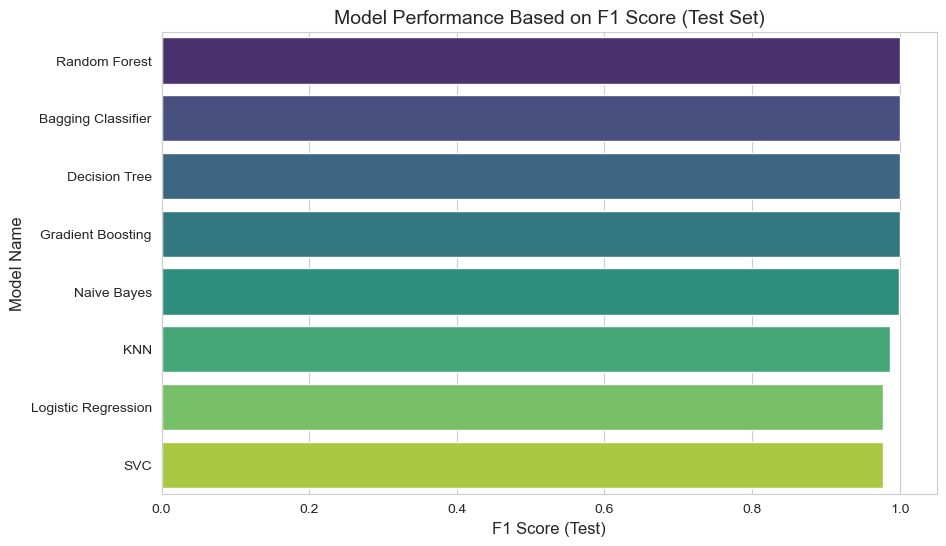

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# List to store model performance
model_summary = []

# Assuming models are already trained
models = {
    "Logistic Regression": model_LR,
    "Decision Tree": model_DT,
    "Random Forest": model_RF,
    "Bagging Classifier": model_BC,
    "KNN": model_KNN,
    "Naive Bayes": model_NB,
    "SVC": model_SVC,
    "Gradient Boosting": model_GB
}

# Loop through each trained model and store results
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_summary.append({
        "model_name": name,
        "accuracy_train": accuracy_score(y_train, y_pred_train),
        "accuracy_test": accuracy_score(y_test, y_pred_test),
        "f1_score_train": f1_score(y_train, y_pred_train, average='weighted'),
        "f1_score_test": f1_score(y_test, y_pred_test, average='weighted'),
        "precision_train": precision_score(y_train, y_pred_train, average='weighted'),
        "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
        "recall_train": recall_score(y_train, y_pred_train, average='weighted'),
        "recall_test": recall_score(y_test, y_pred_test, average='weighted')
    })

# Convert to DataFrame and sort by F1 score
summary_1 = pd.DataFrame(model_summary).sort_values('f1_score_test', ascending=False)

# ✅ Ensure 'model_name' is NOT removed
# summary.drop(columns=['model_name'], inplace=True)  # ❌ Do NOT drop this column!

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=summary_1['model_name'], x=summary_1['f1_score_test'], palette="viridis")

# Labels and title
plt.xlabel('F1 Score (Test)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.title('Model Performance Based on F1 Score (Test Set)', fontsize=14)

# Show plot
plt.show()


In [176]:
summary_1

,model_name,accuracy_train,accuracy_test,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
2,Random Forest,1.000000,0.999857,1.000000,0.999857,1.000000,0.999857,1.000000,0.999857
3,Bagging Classifier,0.999969,0.999857,0.999969,0.999857,0.999969,0.999857,0.999969,0.999857
1,Decision Tree,1.000000,0.999785,1.000000,0.999785,1.000000,0.999785,1.000000,0.999785
7,Gradient Boosting,0.999877,0.999714,0.999877,0.999713,0.999877,0.999713,0.999877,0.999714
5,Naive Bayes,0.998958,0.998641,0.998947,0.998616,0.998949,0.998631,0.998958,0.998641
4,KNN,0.991325,0.988628,0.990458,0.987408,0.990442,0.987005,0.991325,0.988628
0,Logistic Regression,0.984980,0.984981,0.977527,0.977528,0.970185,0.970187,0.984980,0.984981
6,SVC,0.984980,0.984981,0.977527,0.977528,0.970185,0.970187,0.984980,0.984981


## Model selection for Task 1

### From the above graph it is found that the bagging_classifier,gradiant boosting performing well compared to other algorithmsand it is performing well above 95 percentage so not using optimization techniques separatlyim considering the gradiant boosting model over bagging_classifier as it performing better in more number of times compared to baggining classiferwill create the gradiant boosting model for further use

## Recheck the High_priority

In [177]:
#model creation
#model initialization
high_priority_model=RandomForestClassifier()

#fitting the model
high_priority_model.fit(X_train,y_train)

#predicting using the model
high_priority_pred=high_priority_model.predict(X_test)

#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,high_priority_pred))
print('\n')
print('classification report')
print(classification_report(y_test,high_priority_pred))
print('==='*10)

metrics on test data
confusion matrix
[[13772     0]
 [    2   208]]


classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      1.00       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



# TASK-2 | FORECASTING

## 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning

In [178]:
data_2=data.copy()

In [179]:
data_2.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292279,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1,8256.316667
1,1,57,88,0,3,3,3,0.415049969,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1,1700.866667
2,1,10,92,0,4,3,4,0.517551335,3,339,3,2012-12-03 15:44:00,2013-10-10 12:53:00,2013-02-12 12:36:00,1,1700.866667
3,1,57,88,0,4,4,4,0.642927218,1,611,13,2012-12-03 15:44:00,2013-10-10 12:53:00,2013-02-12 12:36:00,1,1700.866667
4,1,57,88,0,4,4,4,0.345258343,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1,7370.900000


In [180]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int32         
 1   CI_Subcat                   46605 non-null  int32         
 2   WBS                         46605 non-null  int32         
 3   Status                      46605 non-null  int32         
 4   Impact                      46605 non-null  int32         
 5   Urgency                     46605 non-null  int32         
 6   Priority                    46605 non-null  int32         
 7   number_cnt                  46605 non-null  object        
 8   Category                    46605 non-null  int32         
 9   KB_number                   46605 non-null  int32         
 10  No_of_Reassignments         46605 non-null  int32         
 11  Open_Time                   46605 non-null  datetime64[ns]


In [181]:
timeseries_data=data_2.sort_values('Open_Time')

In [182]:
timeseries_data.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
11,1,57,88,0,4,4,4,0.291927638,1,611,8,2012-01-10 10:49:00,2013-08-11 14:18:00,2013-08-11 14:22:00,1,13899.550000
16,11,57,73,0,4,4,4,0.440612692,1,852,1,2012-02-10 12:12:00,2013-10-10 12:53:00,2013-08-11 14:58:00,1,13154.766667
15,1,57,55,0,4,4,4,0.701704659,1,401,3,2012-02-10 12:12:00,2013-08-11 14:57:00,2013-08-11 14:58:00,1,13154.766667
14,1,45,90,0,3,3,3,0.025310167,1,670,1,2012-02-10 12:12:00,2013-12-12 10:23:00,2013-12-12 10:24:00,1,16102.200000
13,1,57,88,0,4,4,4,0.592713494,1,611,17,2012-02-10 12:12:00,2013-10-10 12:53:00,2014-04-02 09:38:00,1,18765.433333


In [183]:
forecast_data=timeseries_data[['CI_Cat','Open_Time']]

In [184]:
forecast_data['Open_Time']=forecast_data['Open_Time'].dt.date

In [185]:
forecast_data.head()

,CI_Cat,Open_Time
11,1,2012-01-10
16,11,2012-02-10
15,1,2012-02-10
14,1,2012-02-10
13,1,2012-02-10


In [186]:
pivot_table = forecast_data.pivot_table(index='Open_Time', columns='CI_Cat', aggfunc='size')

In [187]:
pd.set_option('display.max_rows',None)
print(pivot_table)

CI_Cat       0       1    2      3     4     5     6     7     8     9     10  \
Open_Time                                                                       
2012-01-10  NaN     1.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-02-10  NaN     4.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-03-09  NaN     2.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-05-02  NaN     NaN  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-05-12  NaN     NaN  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-07-12  NaN     1.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-10-08  NaN     5.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-10-12  NaN     5.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2012-12-03  NaN     3.0  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2013-01-03  NaN     NaN  NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2013-01-05  NaN     1.0  NaN

In [188]:
final_df=pd.DataFrame(pivot_table)

In [189]:
final_df.index=pd.to_datetime(final_df.index)

In [190]:
final_df.fillna(0,inplace=True)

In [191]:
len(final_df)

131

In [192]:
daily_data = final_df.resample('D', closed='right', label='right').asfreq()

In [193]:

quaterly_data = daily_data.resample('Q').sum()

In [194]:
quaterly_data

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-03-31,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-09-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-03-31,0.0,1794.0,0.0,210.0,4.0,8.0,21.0,6.0,6.0,22.0,33.0,415.0
2013-06-30,0.0,2000.0,2.0,214.0,4.0,20.0,12.0,5.0,14.0,17.0,51.0,428.0
2013-09-30,0.0,1702.0,0.0,195.0,3.0,15.0,13.0,7.0,7.0,11.0,26.0,362.0
2013-12-31,1.0,12093.0,3.0,1456.0,42.0,76.0,93.0,40.0,63.0,103.0,219.0,2702.0
2014-03-31,0.0,1078.0,0.0,115.0,14.0,2.0,24.0,1.0,7.0,15.0,28.0,284.0


In [195]:
quaterly_data.shape

(12, 12)

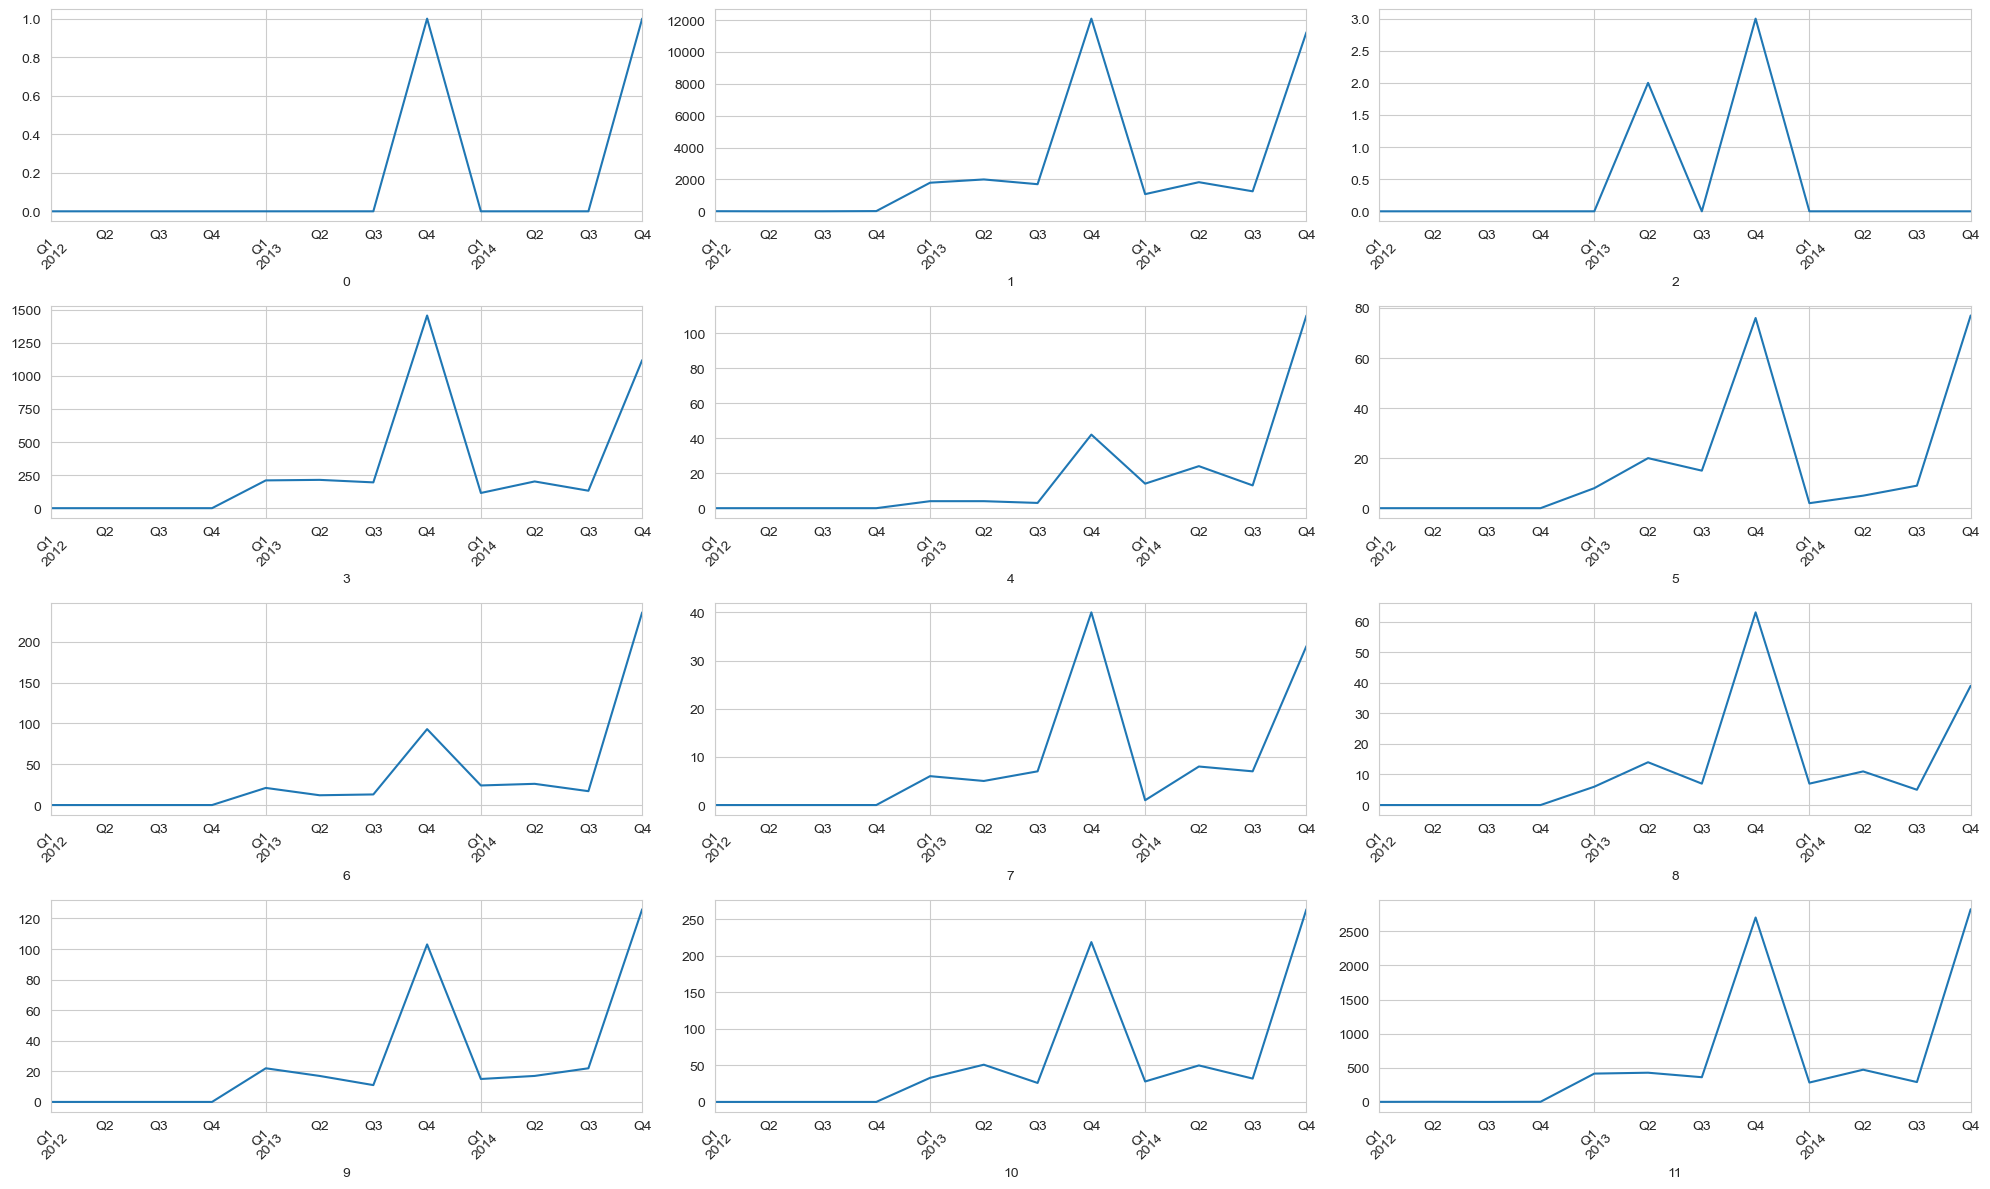

In [196]:
plt.figure(figsize=(20,12))
pl_no=1
for i in quaterly_data.columns:
  plt.subplot(4,3,pl_no)
  quaterly_data[i].plot()
  plt.xlabel(i)
  plt.xticks(rotation=45)
  pl_no+=1
plt.tight_layout()

In [197]:
from statsmodels.tsa.stattools import adfuller

In [198]:
def perform_adf_test(data):

  stationary_cols=[]
  non_stationary_cols=[]

  for column in data.columns:

    result = adfuller(data[column])

    if result[1]<=0.05:
      print(f"{column} is stationary ")
    else:
      print(f"{column} is  not stationary ")

In [199]:
data_diff_1=quaterly_data.diff()

In [200]:
data_diff_1.dropna()

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-06-30,0.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-09-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2012-12-31,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-03-31,0.0,1781.0,0.0,210.0,4.0,8.0,21.0,6.0,6.0,22.0,33.0,413.0
2013-06-30,0.0,206.0,2.0,4.0,0.0,12.0,-9.0,-1.0,8.0,-5.0,18.0,13.0
2013-09-30,0.0,-298.0,-2.0,-19.0,-1.0,-5.0,1.0,2.0,-7.0,-6.0,-25.0,-66.0
2013-12-31,1.0,10391.0,3.0,1261.0,39.0,61.0,80.0,33.0,56.0,92.0,193.0,2340.0
2014-03-31,-1.0,-11015.0,-3.0,-1341.0,-28.0,-74.0,-69.0,-39.0,-56.0,-88.0,-191.0,-2418.0
2014-06-30,0.0,750.0,0.0,87.0,10.0,3.0,2.0,7.0,4.0,2.0,22.0,188.0


In [201]:
perform_adf_test(data_diff_1.dropna())

0 is stationary 
1 is stationary 
2 is stationary 
3 is stationary 
4 is  not stationary 
5 is  not stationary 
6 is stationary 
7 is stationary 
8 is stationary 
9 is stationary 
10 is stationary 
11 is stationary 


In [202]:
data_diff_2=quaterly_data.diff().diff()


In [203]:
data_diff_3=quaterly_data.diff().diff().diff()

In [204]:
perform_adf_test(data_diff_2.dropna())

0 is  not stationary 
1 is stationary 
2 is stationary 
3 is  not stationary 
4 is  not stationary 
5 is  not stationary 
6 is  not stationary 
7 is  not stationary 
8 is  not stationary 
9 is stationary 
10 is  not stationary 
11 is stationary 


In [205]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

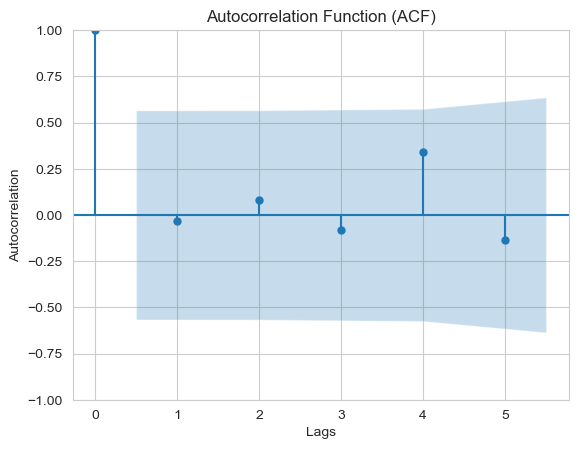

<Figure size 1200x600 with 0 Axes>

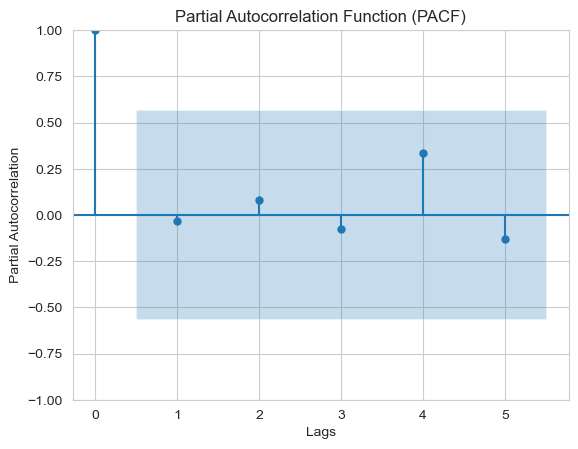

In [206]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(quaterly_data[10], lags=5, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(quaterly_data[10], lags=5, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

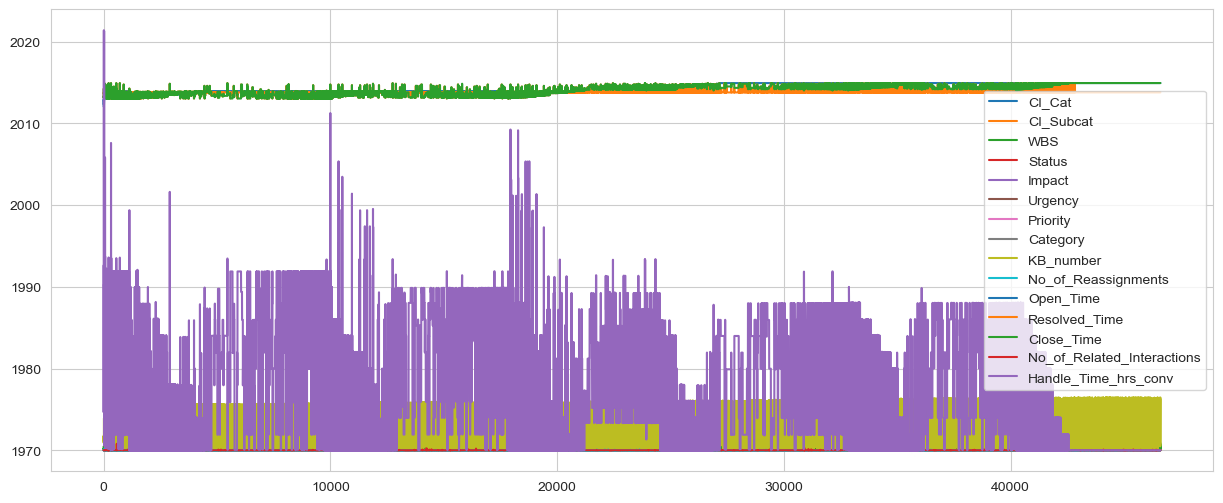

In [207]:
# Plotting number of tickets per day after October 2013
data_2.plot(figsize=(15,6))
plt.show()

In [208]:
from statsmodels.tsa.arima.model import ARIMA  # ✅ Import ARIMA

#  Perform the forecasting for each column
arima_forecast = {}
steps = 12
for column in quaterly_data.columns:
    model = ARIMA(quaterly_data[column], order=(1, 2, 1))  # ARIMA(1, 0, 0) model
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    arima_forecast[column] = forecast

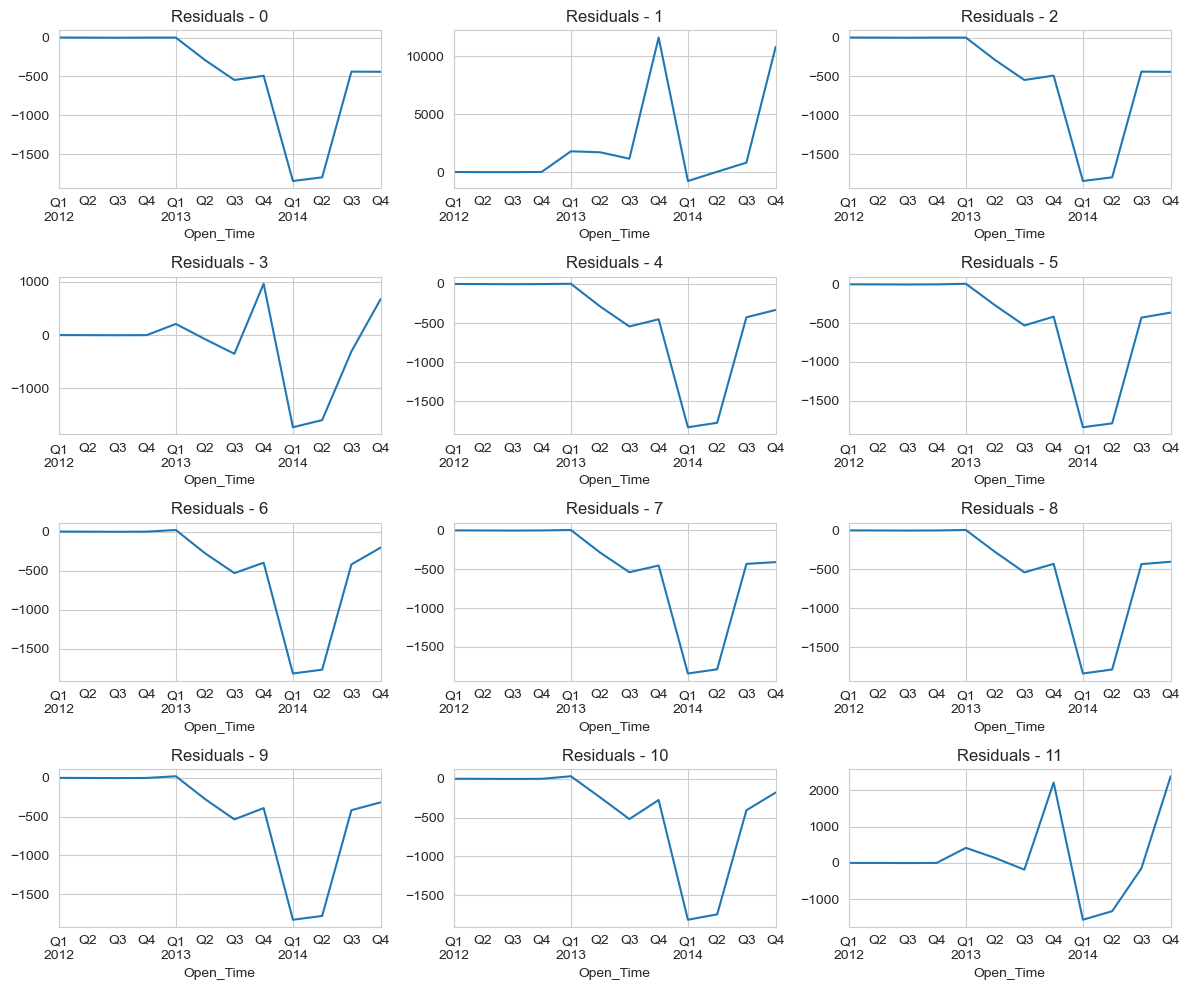

In [209]:
plt.figure(figsize=(12, 10))
pl_no = 1

for column, results in arima_forecast.items():
    residuals = quaterly_data[column] - model_fit.fittedvalues
    plt.subplot(4, 3, pl_no)
    residuals.plot()
    plt.title(f'Residuals - {column}')
    pl_no += 1

plt.tight_layout()
plt.show()

In [210]:
arima_forecast_data=pd.DataFrame(arima_forecast)

In [211]:
arima_forecast_data=arima_forecast_data.astype(int)
arima_forecast_data

,0,1,2,3,4,5,6,7,8,9,10,11
2015-03-31,0,6709,0,752,74,59,354,24,25,99,170,1725
2015-06-30,0,10191,0,1040,119,73,559,31,36,122,246,2582
2015-09-30,0,9250,0,1011,116,75,690,31,34,126,234,2387
2015-12-31,1,10751,0,1135,142,82,885,35,39,137,267,2758
2016-03-31,1,10904,0,1186,150,87,1024,37,41,146,277,2824
2016-06-30,1,11801,0,1272,169,93,1211,39,44,156,299,3054
2016-09-30,1,12287,0,1341,181,98,1357,42,46,165,315,3196
2016-12-31,1,13000,0,1418,197,104,1539,44,49,174,334,3386
2017-03-31,1,13588,0,1491,211,110,1690,46,52,184,351,3550
2017-06-30,1,14245,0,1566,226,115,1867,49,54,193,369,3727


In [212]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
columns_to_forecast = quaterly_data.columns

# Perform the forecasting for each column
sarima_forecast = {}
for column in columns_to_forecast:
    model = SARIMAX(quaterly_data[column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # SARIMAX(1, 0, 0)(1, 0, 0, 12) model
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
    sarima_forecast[column] = forecast

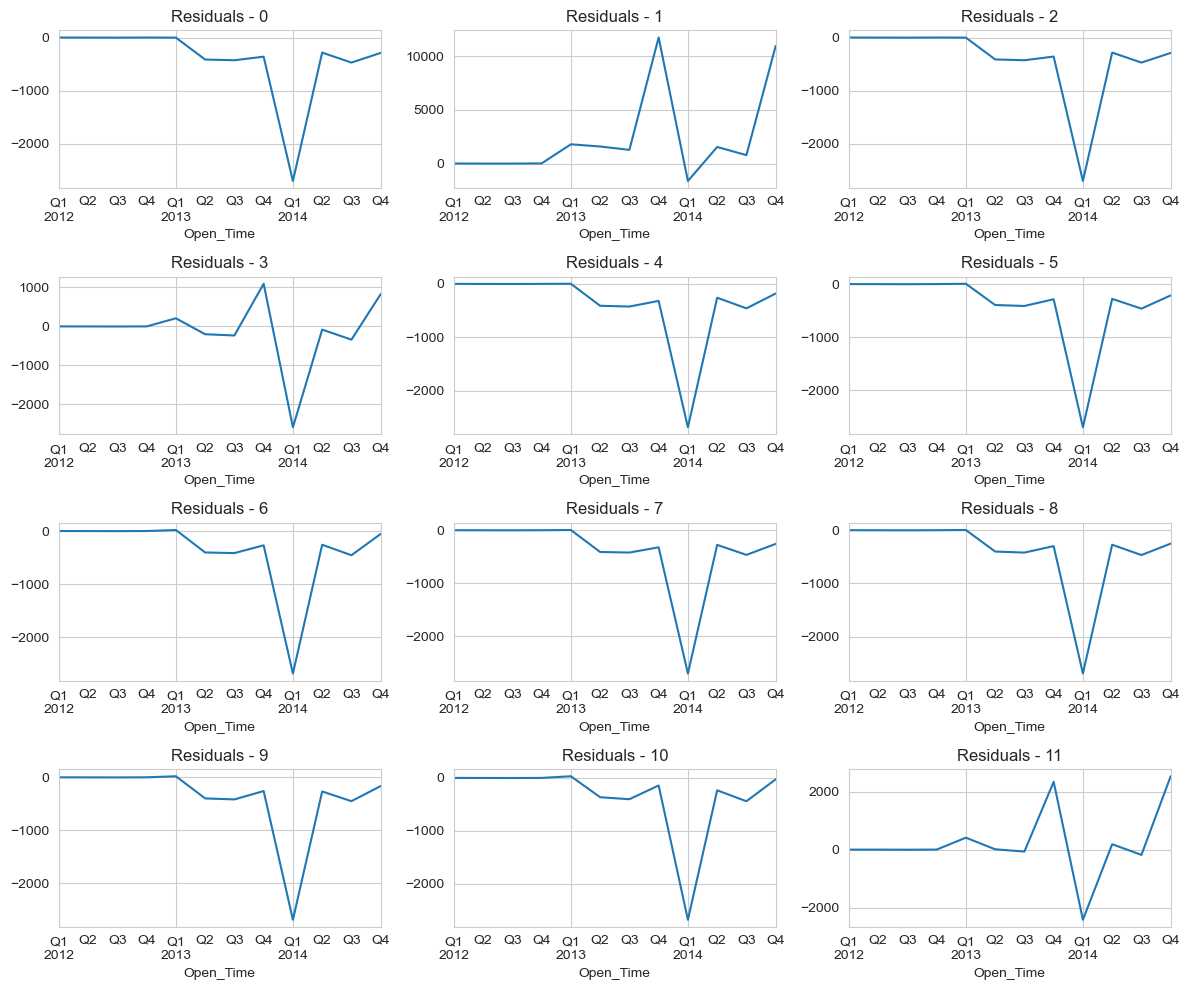

In [213]:
plt.figure(figsize=(12, 10))
pl_no = 1

for column, results in sarima_forecast.items():
    residuals = quaterly_data[column] - model_fit.fittedvalues
    plt.subplot(4, 3, pl_no)
    residuals.plot()
    plt.title(f'Residuals - {column}')
    pl_no += 1

plt.tight_layout()
plt.show()

In [214]:
sarima_forecast_data=pd.DataFrame(sarima_forecast)

In [215]:
sarima_forecast_data=sarima_forecast_data.astype(int)
sarima_forecast_data

,0,1,2,3,4,5,6,7,8,9,10,11
2015-03-31,1,11242,0,1119,109,76,235,33,38,125,264,2823
2015-06-30,1,11235,0,1119,109,76,235,33,38,125,264,2824
2015-09-30,1,11236,0,1119,109,76,235,33,38,125,264,2822
2015-12-31,1,11248,0,1119,109,76,235,33,38,125,264,2824
2016-03-31,1,13029,0,1329,113,84,257,39,44,148,297,3237
2016-06-30,1,13235,1,1333,113,96,248,38,52,143,315,3250
2016-09-30,0,12937,0,1314,112,91,249,40,45,137,290,3184
2016-12-31,2,23328,3,2575,152,152,329,73,102,229,483,5524
2017-03-31,1,12313,0,1233,124,78,260,34,45,141,292,3106
2017-06-30,1,13063,0,1321,134,81,262,41,50,143,314,3294


## About forecast models

## Created 2 forecasting models for predicting the volumns Quaterly and Annualy
## Out of Arima_model and Sarima_model ,arima model performingvery well in forecasting and i plotted the results above.

# TASK 3

## Auto tag the tickets with right priorities and right department

In [216]:
data_3=data.copy()

In [217]:
data_3.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292279,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1,8256.316667
1,1,57,88,0,3,3,3,0.415049969,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1,1700.866667
2,1,10,92,0,4,3,4,0.517551335,3,339,3,2012-12-03 15:44:00,2013-10-10 12:53:00,2013-02-12 12:36:00,1,1700.866667
3,1,57,88,0,4,4,4,0.642927218,1,611,13,2012-12-03 15:44:00,2013-10-10 12:53:00,2013-02-12 12:36:00,1,1700.866667
4,1,57,88,0,4,4,4,0.345258343,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1,7370.900000


In [218]:
data_3=data_3.drop(['Open_Time','Resolved_Time','Close_Time'],axis=1)

## Function for model selection Task 3

## Logic behind the function

### Function called model_selection will take model as parameter 3.initially the model will be initiated within the function and will be stored in the variable called model
### Model will be fitted on x_train and y_train 
### model will first predict on test data 
### After prediction all the evaluation metric values will be appended to dictionary with corresponding key values.
### Then it will print the confusion matrix and classification report of that model 
### The same steps will also the performed on train data



In [219]:
X1=data_3.drop(['Priority','CI_Cat','Urgency'],axis=1)

In [220]:
X1.head()

,CI_Subcat,WBS,Status,Impact,number_cnt,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,57,162,0,4,0.601292279,1,553,26,1,8256.316667
1,57,88,0,3,0.415049969,1,611,33,1,1700.866667
2,10,92,0,4,0.517551335,3,339,3,1,1700.866667
3,57,88,0,4,0.642927218,1,611,13,1,1700.866667
4,57,88,0,4,0.345258343,1,611,2,1,7370.900000


## First Target Variable for Right Priority = y1

In [221]:
y1=data_3['Priority']

In [222]:
y1.head()

0    4
1    3
2    4
3    4
4    4
Name: Priority, dtype: int32

## Second Target Variable for Right Departnment = y2

In [223]:
y2=data_3['CI_Cat']

## Y1 = Right Priority

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42,stratify=y1)

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model_RF3 = RandomForestClassifier(random_state=42)

# Train model
model_RF3.fit(X_train, y_train)

# Predictions on Train and Test Data
y_train_pred_RF3 = model_RF3.predict(X_train)
y_test_pred_RF3 = model_RF3.predict(X_test)

# Evaluate on Train Data
print("===== Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_RF3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_RF3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_RF3))

# Evaluate on Test Data
print("\n===== Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_RF3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_RF3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_RF3))

# Check class distribution in test data
print("\n===== Test Data Class Distribution =====")
print(y_test.value_counts())

===== Train Data Metrics =====
Train Accuracy: 0.9999693467798793
Train Confusion Matrix:
 [[    2     0     0     0     0]
 [    0   488     0     0     0]
 [    0     0  3726     0     0]
 [    0     0     0 16867     1]
 [    0     0     0     0 11539]]
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      3726
           4       1.00      1.00      1.00     16868
           5       1.00      1.00      1.00     11539

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Test Data Metrics =====
Test Accuracy: 0.9957087684165356
Test Confusion Matrix:
 [[   0    1    0    0    0]
 [   0  207    2    0    0]
 [   0    0 1567   28    2]
 [   0    0    3 7202   24]
 [   0    0    0    0 4

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model_LR3 = LogisticRegression()
model_LR3.fit(X_train_scaled, y_train)

# Predictions (Use Scaled Data)
y_train_pred_LR3 = model_LR3.predict(X_train_scaled)
y_test_pred_LR3 = model_LR3.predict(X_test_scaled)

# Evaluate on Train Data
print("===== Logistic Regression - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_LR3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_LR3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_LR3))

# Evaluate on Test Data
print("\n===== Logistic Regression - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_LR3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_LR3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_LR3))


===== Logistic Regression - Train Data Metrics =====
Train Accuracy: 0.9921527756490819
Train Confusion Matrix:
 [[    0     2     0     0     0]
 [    0   485     3     0     0]
 [    0     0  3659    67     0]
 [    0     0     5 16684   179]
 [    0     0     0     0 11539]]
Train Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.99      0.99       488
           3       1.00      0.98      0.99      3726
           4       1.00      0.99      0.99     16868
           5       0.98      1.00      0.99     11539

    accuracy                           0.99     32623
   macro avg       0.79      0.79      0.79     32623
weighted avg       0.99      0.99      0.99     32623


===== Logistic Regression - Test Data Metrics =====
Test Accuracy: 0.9916320984122443
Test Confusion Matrix:
 [[   0    1    0    0    0]
 [   0  207    2    0    0]
 [   0    2 1560   33    2]
 [   0 

In [227]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model_DT3 = DecisionTreeClassifier()

# Train model
model_DT3.fit(X_train, y_train)

# Predictions
y_train_pred_DT3 = model_DT3.predict(X_train)
y_test_pred_DT3 = model_DT3.predict(X_test)

# Evaluate on Train Data
print("===== Decision Tree - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_DT3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_DT3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_DT3))

# Evaluate on Test Data
print("\n===== Decision Tree - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_DT3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_DT3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_DT3))


===== Decision Tree - Train Data Metrics =====
Train Accuracy: 1.0
Train Confusion Matrix:
 [[    2     0     0     0     0]
 [    0   488     0     0     0]
 [    0     0  3726     0     0]
 [    0     0     0 16868     0]
 [    0     0     0     0 11539]]
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      3726
           4       1.00      1.00      1.00     16868
           5       1.00      1.00      1.00     11539

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Decision Tree - Test Data Metrics =====
Test Accuracy: 0.9934201115720211
Test Confusion Matrix:
 [[   1    0    0    0    0]
 [   0  207    2    0    0]
 [   0    4 1566   25    2]
 [   0    0   17 7194   18]
 [   0

In [228]:
from sklearn.ensemble import BaggingClassifier

# Initialize model
model_BC3 = BaggingClassifier()

# Train model
model_BC3.fit(X_train, y_train)

# Predictions
y_train_pred_BC3 = model_BC3.predict(X_train)
y_test_pred_BC3 = model_BC3.predict(X_test)

# Evaluate on Train Data
print("===== Bagging Classifier - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_BC3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_BC3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_BC3))

# Evaluate on Test Data
print("\n===== Bagging Classifier - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_BC3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_BC3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_BC3))


===== Bagging Classifier - Train Data Metrics =====
Train Accuracy: 0.9996628145786715
Train Confusion Matrix:
 [[    2     0     0     0     0]
 [    0   488     0     0     0]
 [    0     0  3722     4     0]
 [    0     0     2 16863     3]
 [    0     0     0     2 11537]]
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      3726
           4       1.00      1.00      1.00     16868
           5       1.00      1.00      1.00     11539

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Bagging Classifier - Test Data Metrics =====
Test Accuracy: 0.9954226863109712
Test Confusion Matrix:
 [[   1    0    0    0    0]
 [   0  207    2    0    0]
 [   0    2 1570   23    2]
 [   0   

In [229]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
model_KNN3 = KNeighborsClassifier()

# Train model
model_KNN3.fit(X_train, y_train)

# Predictions
y_train_pred_KNN3 = model_KNN3.predict(X_train)
y_test_pred_KNN3 = model_KNN3.predict(X_test)

# Evaluate on Train Data
print("===== KNN - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_KNN3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_KNN3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_KNN3))

# Evaluate on Test Data
print("\n===== KNN - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_KNN3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_KNN3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_KNN3))


===== KNN - Train Data Metrics =====
Train Accuracy: 0.8515464549550931
Train Confusion Matrix:
 [[    0     0     0     2     0]
 [    0   312    36   101    39]
 [    0    63  2635   800   228]
 [    0    60   670 15206   932]
 [    0    14   247  1651  9627]]
Train Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.69      0.64      0.67       488
           3       0.73      0.71      0.72      3726
           4       0.86      0.90      0.88     16868
           5       0.89      0.83      0.86     11539

    accuracy                           0.85     32623
   macro avg       0.63      0.62      0.63     32623
weighted avg       0.85      0.85      0.85     32623


===== KNN - Test Data Metrics =====
Test Accuracy: 0.7895150908310685
Test Confusion Matrix:
 [[   0    0    0    0    1]
 [   0  112   23   58   16]
 [   0   38  929  483  147]
 [   0   52  382 6175  620]
 [   0    8

In [230]:
from sklearn.naive_bayes import GaussianNB

# Initialize model
model_NB3 = GaussianNB()

# Train model
model_NB3.fit(X_train, y_train)

# Predictions
y_train_pred_NB3 = model_NB3.predict(X_train)
y_test_pred_NB3 = model_NB3.predict(X_test)

# Evaluate on Train Data
print("===== Naive Bayes - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_NB3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_NB3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_NB3))

# Evaluate on Test Data
print("\n===== Naive Bayes - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_NB3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_NB3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_NB3))


===== Naive Bayes - Train Data Metrics =====
Train Accuracy: 0.9914784048064249
Train Confusion Matrix:
 [[    2     0     0     0     0]
 [    0   477    11     0     0]
 [    0     7  3652    67     0]
 [    0     3     5 16681   179]
 [    0     0     0     6 11533]]
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.98      0.98      0.98       488
           3       1.00      0.98      0.99      3726
           4       1.00      0.99      0.99     16868
           5       0.98      1.00      0.99     11539

    accuracy                           0.99     32623
   macro avg       0.99      0.99      0.99     32623
weighted avg       0.99      0.99      0.99     32623


===== Naive Bayes - Test Data Metrics =====
Test Accuracy: 0.9910599342011157
Test Confusion Matrix:
 [[   0    1    0    0    0]
 [   0  203    5    1    0]
 [   0    3 1560   32    2]
 [   0    0    3 7152  

In [231]:
from sklearn.svm import SVC

# Initialize model
model_SVC3 = SVC()

# Train model
model_SVC3.fit(X_train, y_train)

# Predictions
y_train_pred_SVC3 = model_SVC3.predict(X_train)
y_test_pred_SVC3 = model_SVC3.predict(X_test)

# Evaluate on Train Data
print("===== SVC - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_SVC3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_SVC3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_SVC3))

# Evaluate on Test Data
print("\n===== SVC - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_SVC3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_SVC3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_SVC3))


===== SVC - Train Data Metrics =====
Train Accuracy: 0.5170585169972105
Train Confusion Matrix:
 [[    0     0     0     2     0]
 [    0     0     0   488     0]
 [    0     0     0  3726     0]
 [    0     0     0 16868     0]
 [    0     0     0 11539     0]]
Train Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00       488
           3       0.00      0.00      0.00      3726
           4       0.52      1.00      0.68     16868
           5       0.00      0.00      0.00     11539

    accuracy                           0.52     32623
   macro avg       0.10      0.20      0.14     32623
weighted avg       0.27      0.52      0.35     32623


===== SVC - Test Data Metrics =====
Test Accuracy: 0.5170218852810756
Test Confusion Matrix:
 [[   0    0    0    1    0]
 [   0    0    0  209    0]
 [   0    0    0 1597    0]
 [   0    0    0 7229    0]
 [   0    0

In [232]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
model_GB3 = GradientBoostingClassifier()

# Train model
model_GB3.fit(X_train, y_train)

# Predictions
y_train_pred_GB3 = model_GB3.predict(X_train)
y_test_pred_GB3 = model_GB3.predict(X_test)

# Evaluate on Train Data
print("===== Gradient Boosting - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_GB3))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_GB3))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_GB3))

# Evaluate on Test Data
print("\n===== Gradient Boosting - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_GB3))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_GB3))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_GB3))


===== Gradient Boosting - Train Data Metrics =====
Train Accuracy: 0.9972718634092511
Train Confusion Matrix:
 [[    2     0     0     0     0]
 [    0   487     1     0     0]
 [    0     0  3697    29     0]
 [    0     0     4 16809    55]
 [    0     0     0     0 11539]]
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       488
           3       1.00      0.99      1.00      3726
           4       1.00      1.00      1.00     16868
           5       1.00      1.00      1.00     11539

    accuracy                           1.00     32623
   macro avg       1.00      1.00      1.00     32623
weighted avg       1.00      1.00      1.00     32623


===== Gradient Boosting - Test Data Metrics =====
Test Accuracy: 0.9946359605206694
Test Confusion Matrix:
 [[   1    0    0    0    0]
 [   0  207    2    0    0]
 [   0    2 1566   27    2]
 [   0    0

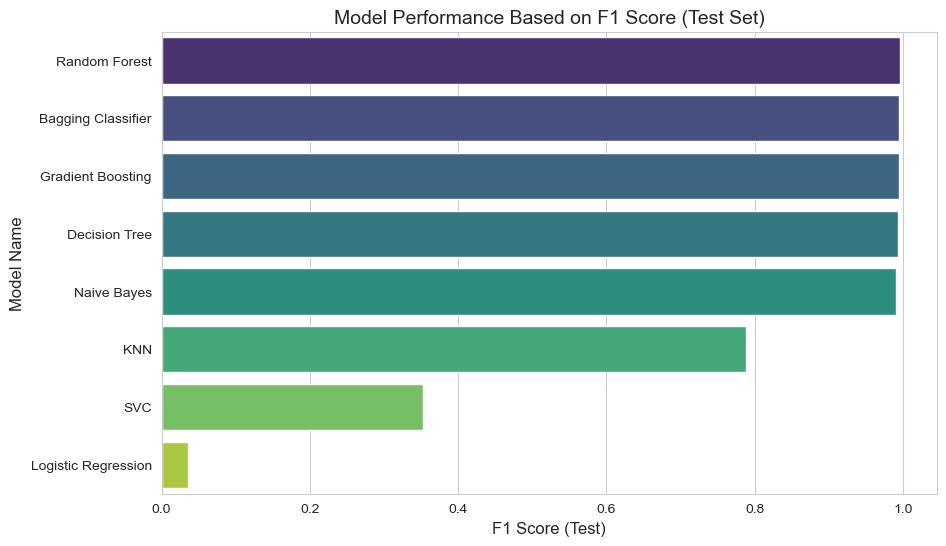

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# List to store model performance
model_summary = []

# Assuming models are already trained
models = {
    "Logistic Regression": model_LR3,
    "Decision Tree": model_DT3,
    "Random Forest": model_RF3,
    "Bagging Classifier": model_BC3,
    "KNN": model_KNN3,
    "Naive Bayes": model_NB3,
    "SVC": model_SVC3,
    "Gradient Boosting": model_GB3
}

# Loop through each trained model and store results
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_summary.append({
        "model_name": name,
        "accuracy_train": accuracy_score(y_train, y_pred_train),
        "accuracy_test": accuracy_score(y_test, y_pred_test),
        "f1_score_train": f1_score(y_train, y_pred_train, average='weighted'),
        "f1_score_test": f1_score(y_test, y_pred_test, average='weighted'),
        "precision_train": precision_score(y_train, y_pred_train, average='weighted'),
        "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
        "recall_train": recall_score(y_train, y_pred_train, average='weighted'),
        "recall_test": recall_score(y_test, y_pred_test, average='weighted')
    })

# Convert to DataFrame and sort by F1 score
summary_31 = pd.DataFrame(model_summary).sort_values('f1_score_test', ascending=False)

# ✅ Ensure 'model_name' is NOT removed
# summary.drop(columns=['model_name'], inplace=True)  # ❌ Do NOT drop this column!

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=summary_31['model_name'], x=summary_31['f1_score_test'], palette="viridis")

# Labels and title
plt.xlabel('F1 Score (Test)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.title('Model Performance Based on F1 Score (Test Set)', fontsize=14)

# Show plot
plt.show()


In [234]:
summary_31

,model_name,accuracy_train,accuracy_test,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
2,Random Forest,0.999969,0.995709,0.999969,0.995665,0.999969,0.995641,0.999969,0.995709
3,Bagging Classifier,0.999663,0.995423,0.999663,0.995418,0.999663,0.995419,0.999663,0.995423
7,Gradient Boosting,0.997272,0.994636,0.997271,0.994629,0.997277,0.994639,0.997272,0.994636
1,Decision Tree,1.000000,0.993420,1.000000,0.993417,1.000000,0.993418,1.000000,0.993420
5,Naive Bayes,0.991478,0.991060,0.991475,0.991017,0.991536,0.991038,0.991478,0.991060
4,KNN,0.851546,0.789515,0.850869,0.788266,0.851508,0.788685,0.851546,0.789515
6,SVC,0.517059,0.517022,0.352458,0.352416,0.267350,0.267312,0.517059,0.517022
0,Logistic Regression,0.050026,0.049349,0.034000,0.035281,0.157873,0.176248,0.050026,0.049349


In [235]:
#model creation
#model initialization
all_priority_model=RandomForestClassifier()

#fitting the model
all_priority_model.fit(X_train,y_train)

#predicting using the model
all_priority_pred=all_priority_model.predict(X_test)

#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,all_priority_pred))
print('\n')
print('classification report')
print(classification_report(y_test,all_priority_pred))
print('==='*10)

metrics on test data
confusion matrix
[[   0    1    0    0    0]
 [   0  207    2    0    0]
 [   0    0 1565   30    2]
 [   0    0    3 7201   25]
 [   0    0    0    0 4946]]


classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.99      0.99       209
           3       1.00      0.98      0.99      1597
           4       1.00      1.00      1.00      7229
           5       0.99      1.00      1.00      4946

    accuracy                           1.00     13982
   macro avg       0.80      0.79      0.79     13982
weighted avg       1.00      1.00      1.00     13982



## Y2=Right Departnment

In [236]:
y2=data_3['CI_Cat']
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size=0.3, random_state=42,stratify=y2)

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model_LR32 = LogisticRegression()
model_LR32.fit(X_train_scaled, y_train)

# Predictions (Use Scaled Data)
y_train_pred_LR32 = model_LR32.predict(X_train_scaled)
y_test_pred_LR32 = model_LR32.predict(X_test_scaled)

# Evaluate on Train Data
print("===== Logistic Regression - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_LR32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_LR32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_LR32))

# Evaluate on Test Data
print("\n===== Logistic Regression - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_LR32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_LR32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_LR32))


===== Logistic Regression - Train Data Metrics =====
Train Accuracy: 0.7282285504092205
Train Confusion Matrix:
 [[    0     2     0     0     0     0     0     0     0     0     0     0]
 [    0 21610     0   583     2     0     0     0     0     0     0   912]
 [    0     4     0     0     0     0     0     0     0     0     0     0]
 [    0  2152     0   383     0     0     0     0     0     0     0    15]
 [    0   150     0     0     0     0     0     0     0     0     0     0]
 [    0   148     0     0     0     0     0     0     0     0     0     0]
 [    0   303     0     6     0     0     0     0     0     0     0     0]
 [    0    75     0     0     0     0     0     0     0     0     0     0]
 [    0   106     0     0     0     0     0     0     0     0     0     0]
 [    0   229     0     4     0     0     0     0     0     0     0     0]
 [    0   492     0     0     0     0     0     0     0     0     0     0]
 [    0  3653     0    30     0     0     0     0     0     0 

In [238]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model_DT32 = DecisionTreeClassifier()

# Train model
model_DT32.fit(X_train, y_train)

# Predictions
y_train_pred_DT32 = model_DT32.predict(X_train)
y_test_pred_DT32 = model_DT32.predict(X_test)

# Evaluate on Train Data
print("===== Decision Tree - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_DT32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_DT32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_DT32))

# Evaluate on Test Data
print("\n===== Decision Tree - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_DT32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_DT32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_DT32))


===== Decision Tree - Train Data Metrics =====
Train Accuracy: 1.0
Train Confusion Matrix:
 [[    2     0     0     0     0     0     0     0     0     0     0     0]
 [    0 23107     0     0     0     0     0     0     0     0     0     0]
 [    0     0     4     0     0     0     0     0     0     0     0     0]
 [    0     0     0  2550     0     0     0     0     0     0     0     0]
 [    0     0     0     0   150     0     0     0     0     0     0     0]
 [    0     0     0     0     0   148     0     0     0     0     0     0]
 [    0     0     0     0     0     0   309     0     0     0     0     0]
 [    0     0     0     0     0     0     0    75     0     0     0     0]
 [    0     0     0     0     0     0     0     0   106     0     0     0]
 [    0     0     0     0     0     0     0     0     0   233     0     0]
 [    0     0     0     0     0     0     0     0     0     0   492     0]
 [    0     0     0     0     0     0     0     0     0     0     0  5447]]
Train C

In [239]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model_RF32 = RandomForestClassifier()

# Train model
model_RF32.fit(X_train, y_train)

# Predictions
y_train_pred_RF32 = model_RF32.predict(X_train)
y_test_pred_RF32 = model_RF32.predict(X_test)

# Evaluate on Train Data
print("===== Random Forest - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_RF32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_RF32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_RF32))

# Evaluate on Test Data
print("\n===== Random Forest - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_RF32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_RF32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_RF32))


===== Random Forest - Train Data Metrics =====
Train Accuracy: 0.9999693467798793
Train Confusion Matrix:
 [[    2     0     0     0     0     0     0     0     0     0     0     0]
 [    0 23107     0     0     0     0     0     0     0     0     0     0]
 [    0     0     4     0     0     0     0     0     0     0     0     0]
 [    0     0     0  2550     0     0     0     0     0     0     0     0]
 [    0     0     0     0   150     0     0     0     0     0     0     0]
 [    0     0     0     0     0   148     0     0     0     0     0     0]
 [    0     0     0     0     0     0   309     0     0     0     0     0]
 [    0     0     0     0     0     0     0    75     0     0     0     0]
 [    0     0     0     0     0     0     0     0   106     0     0     0]
 [    0     0     0     0     0     0     0     0     0   233     0     0]
 [    0     0     0     0     0     0     0     0     0     0   492     0]
 [    0     1     0     0     0     0     0     0     0     0     0 

In [240]:
from sklearn.ensemble import BaggingClassifier

# Initialize model
model_BC32 = BaggingClassifier()

# Train model
model_BC32.fit(X_train, y_train)

# Predictions
y_train_pred_BC32 = model_BC32.predict(X_train)
y_test_pred_BC32 = model_BC32.predict(X_test)

# Evaluate on Train Data
print("===== Bagging Classifier - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_BC32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_BC32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_BC32))

# Evaluate on Test Data
print("\n===== Bagging Classifier - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_BC32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_BC32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_BC32))


===== Bagging Classifier - Train Data Metrics =====
Train Accuracy: 0.9990804033963768
Train Confusion Matrix:
 [[    1     0     0     1     0     0     0     0     0     0     0     0]
 [    0 23105     0     0     0     0     0     0     0     0     0     2]
 [    0     0     4     0     0     0     0     0     0     0     0     0]
 [    0     0     0  2550     0     0     0     0     0     0     0     0]
 [    0     0     0     0   150     0     0     0     0     0     0     0]
 [    0     0     0     0     0   148     0     0     0     0     0     0]
 [    0     0     0     0     0     0   309     0     0     0     0     0]
 [    0     1     0     1     0     0     0    73     0     0     0     0]
 [    0     0     0     0     0     0     0     0   106     0     0     0]
 [    0     0     0     0     0     0     0     0     1   232     0     0]
 [    0     0     0     0     0     0     0     0     0     1   491     0]
 [    0    23     0     0     0     0     0     0     0     0  

In [241]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
model_KNN32 = KNeighborsClassifier()

# Train model
model_KNN32.fit(X_train, y_train)

# Predictions
y_train_pred_KNN32 = model_KNN32.predict(X_train)
y_test_pred_KNN32 = model_KNN32.predict(X_test)

# Evaluate on Train Data
print("===== KNN - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_KNN32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_KNN32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_KNN32))

# Evaluate on Test Data
print("\n===== KNN - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_KNN32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_KNN32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_KNN32))


===== KNN - Train Data Metrics =====
Train Accuracy: 0.928486037458235
Train Confusion Matrix:
 [[    0     2     0     0     0     0     0     0     0     0     0     0]
 [    0 22409     0   128     1     1    24     3     5    17    30   489]
 [    0     3     0     0     0     0     0     0     0     1     0     0]
 [    0   356     0  2156     0    15     0     0     2     3     5    13]
 [    0    18     0     2   130     0     0     0     0     0     0     0]
 [    0    19     0    19     0   109     0     0     0     0     0     1]
 [    0    82     0    16     1     3   200     1     0     3     2     1]
 [    0    38     0     5     2     0     3    22     0     5     0     0]
 [    0    59     0     1     0     0     0     0    45     0     0     1]
 [    0    60     0     1     0     0     3     0     0   148     0    21]
 [    0    75     0     8     0     2     3     0     1     1   397     5]
 [    0   726     0    33     1     0     0     0     5     4     4  4674]]
Tra

In [242]:
from sklearn.naive_bayes import GaussianNB

# Initialize model
model_NB32 = GaussianNB()

# Train model
model_NB32.fit(X_train, y_train)

# Predictions
y_train_pred_NB32 = model_NB32.predict(X_train)
y_test_pred_NB32 = model_NB32.predict(X_test)

# Evaluate on Train Data
print("===== Naive Bayes - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_NB32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_NB32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_NB32))

# Evaluate on Test Data
print("\n===== Naive Bayes - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_NB32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_NB32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_NB32))


===== Naive Bayes - Train Data Metrics =====
Train Accuracy: 0.5906262452870674
Train Confusion Matrix:
 [[    2     0     0     0     0     0     0     0     0     0     0     0]
 [    0 12337    11  2359    28     0   677   214   240    98   266  6877]
 [    0     0     3     0     0     0     1     0     0     0     0     0]
 [    0   280     7  2100     0     0    12     1    27    15    17    91]
 [    0     4     0     0   143     0     3     0     0     0     0     0]
 [    0     3     0     0     0   145     0     0     0     0     0     0]
 [    0    62     0    82     3     0   159     2     0     0     1     0]
 [    0    24     1     3     0     0     4    36     6     1     0     0]
 [    0    13     0    11     0     0     0     0    71     0     1    10]
 [    0   111     0     5     0     0    34     1     1    35     0    46]
 [    0    96     1    89     0     0    18     0   214     0    74     0]
 [    0  1146     0    72     0     0    22     2     6     8    28  4

In [243]:
from sklearn.svm import SVC

# Initialize model
model_SVC32 = SVC()

# Train model
model_SVC32.fit(X_train, y_train)

# Predictions
y_train_pred_SVC32 = model_SVC32.predict(X_train)
y_test_pred_SVC32 = model_SVC32.predict(X_test)

# Evaluate on Train Data
print("===== SVC - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_SVC32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_SVC32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_SVC32))

# Evaluate on Test Data
print("\n===== SVC - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_SVC32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_SVC32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_SVC32))


===== SVC - Train Data Metrics =====
Train Accuracy: 0.7083039573307176
Train Confusion Matrix:
 [[    0     2     0     0     0     0     0     0     0     0     0     0]
 [    0 23107     0     0     0     0     0     0     0     0     0     0]
 [    0     4     0     0     0     0     0     0     0     0     0     0]
 [    0  2550     0     0     0     0     0     0     0     0     0     0]
 [    0   150     0     0     0     0     0     0     0     0     0     0]
 [    0   148     0     0     0     0     0     0     0     0     0     0]
 [    0   309     0     0     0     0     0     0     0     0     0     0]
 [    0    75     0     0     0     0     0     0     0     0     0     0]
 [    0   106     0     0     0     0     0     0     0     0     0     0]
 [    0   233     0     0     0     0     0     0     0     0     0     0]
 [    0   492     0     0     0     0     0     0     0     0     0     0]
 [    0  5447     0     0     0     0     0     0     0     0     0     0]]
Tr

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
model_GB32 = GradientBoostingClassifier()

# Train model
model_GB32.fit(X_train, y_train)

# Predictions
y_train_pred_GB32 = model_GB32.predict(X_train)
y_test_pred_GB32 = model_GB32.predict(X_test)

# Evaluate on Train Data
print("===== Gradient Boosting - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_GB32))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_GB32))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_GB32))

# Evaluate on Test Data
print("\n===== Gradient Boosting - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_GB32))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_GB32))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_GB32))


===== Gradient Boosting - Train Data Metrics =====
Train Accuracy: 0.9756000367838642
Train Confusion Matrix:
 [[    2     0     0     0     0     0     0     0     0     0     0     0]
 [    0 22919     0     0     0     0     0     0     0     0     0   188]
 [    0     0     4     0     0     0     0     0     0     0     0     0]
 [    0     0     0  2550     0     0     0     0     0     0     0     0]
 [    0     0     0     0   150     0     0     0     0     0     0     0]
 [    0     0     0     0     0   148     0     0     0     0     0     0]
 [    0     0     0     0     0     0   309     0     0     0     0     0]
 [    0     0     0     0     0     0     0    75     0     0     0     0]
 [    0     0     0     0     0     0     0     0   106     0     0     0]
 [    0     0     0     0     0     0     0     0     0   233     0     0]
 [    0     0     0     0     0     0     0     0     0     0   492     0]
 [    0   608     0     0     0     0     0     0     0     0   

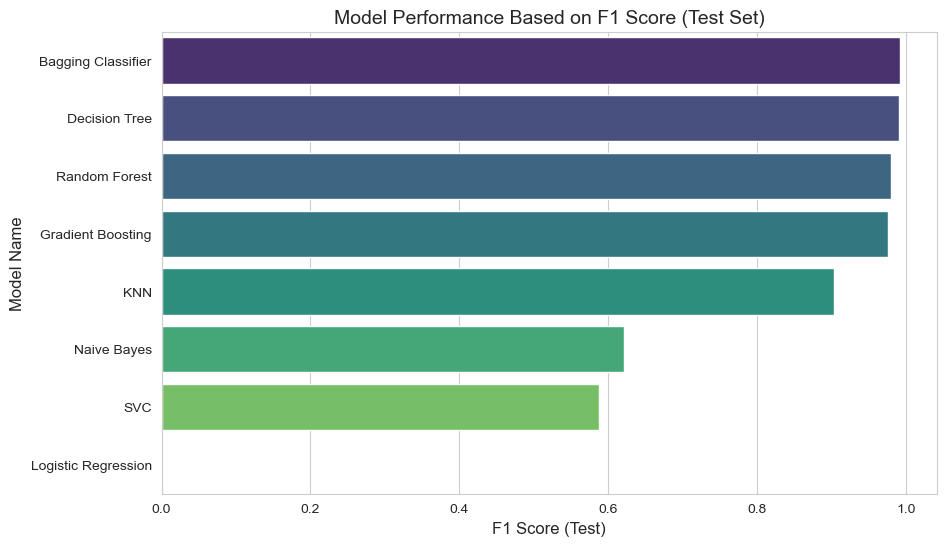

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# List to store model performance
model_summary = []

# Assuming models are already trained
models = {
    "Logistic Regression": model_LR32,
    "Decision Tree": model_DT32,
    "Random Forest": model_RF32,
    "Bagging Classifier": model_BC32,
    "KNN": model_KNN32,
    "Naive Bayes": model_NB32,
    "SVC": model_SVC32,
    "Gradient Boosting": model_GB32
}

# Loop through each trained model and store results
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_summary.append({
        "model_name": name,
        "accuracy_train": accuracy_score(y_train, y_pred_train),
        "accuracy_test": accuracy_score(y_test, y_pred_test),
        "f1_score_train": f1_score(y_train, y_pred_train, average='weighted'),
        "f1_score_test": f1_score(y_test, y_pred_test, average='weighted'),
        "precision_train": precision_score(y_train, y_pred_train, average='weighted'),
        "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
        "recall_train": recall_score(y_train, y_pred_train, average='weighted'),
        "recall_test": recall_score(y_test, y_pred_test, average='weighted')
    })

# Convert to DataFrame and sort by F1 score
summary_32 = pd.DataFrame(model_summary).sort_values('f1_score_test', ascending=False)

# ✅ Ensure 'model_name' is NOT removed
# summary.drop(columns=['model_name'], inplace=True)  # ❌ Do NOT drop this column!

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=summary_32['model_name'], x=summary_32['f1_score_test'], palette="viridis")

# Labels and title
plt.xlabel('F1 Score (Test)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.title('Model Performance Based on F1 Score (Test Set)', fontsize=14)

# Show plot
plt.show()


In [246]:
summary_32

,model_name,accuracy_train,accuracy_test,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
3,Bagging Classifier,0.999080,0.990988,0.999074,0.990952,0.999081,0.990948,0.999080,0.990988
1,Decision Tree,1.000000,0.989773,1.000000,0.989816,1.000000,0.989869,1.000000,0.989773
2,Random Forest,0.999969,0.979044,0.999969,0.978839,0.999969,0.978941,0.999969,0.979044
7,Gradient Boosting,0.975600,0.975826,0.975221,0.975457,0.975451,0.975718,0.975600,0.975826
4,KNN,0.928486,0.905021,0.926628,0.902733,0.926970,0.903623,0.928486,0.905021
5,Naive Bayes,0.590626,0.597053,0.614822,0.620903,0.732921,0.738388,0.590626,0.597053
6,SVC,0.708304,0.708268,0.587360,0.587312,0.501694,0.501643,0.708304,0.708268
0,Logistic Regression,0.008276,0.007724,0.000680,0.000941,0.000489,0.000880,0.008276,0.007724


In [247]:
#model creation
#model initialization
department_classification_model=BaggingClassifier()

#fitting the model
department_classification_model.fit(X_train,y_train)

#predicting using the model
department_classification_pred=department_classification_model.predict(X_test)

#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,department_classification_pred))
print('\n')
print('classification report')
print(classification_report(y_test,department_classification_pred))
print('==='*10)

metrics on test data
confusion matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 9859    0    0    0    0    0    0    0    0    0   44]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0 1092    0    0    0    0    0    0    0    0]
 [   0    0    0    0   63    0    0    1    0    0    0    0]
 [   0    0    0    0    0   64    0    0    0    0    0    0]
 [   0    1    0    0    0    0  132    0    0    0    0    0]
 [   0    0    0    1    1    1    2   25    0    0    2    0]
 [   0    0    0    0    0    0    0    0   46    0    0    0]
 [   0    0    0    0    0    0    0    0    0  100    0    0]
 [   0    1    0    0    0    0    0    1    0    1  208    0]
 [   0   67    0    0    0    0    0    0    0    0    0 2268]]


classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      1.00      0.99      9903
           2      

# Task 4
## Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [248]:
data_4=data.copy()

In [249]:
data_4.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292279,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1,8256.316667
1,1,57,88,0,3,3,3,0.415049969,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1,1700.866667
2,1,10,92,0,4,3,4,0.517551335,3,339,3,2012-12-03 15:44:00,2013-10-10 12:53:00,2013-02-12 12:36:00,1,1700.866667
3,1,57,88,0,4,4,4,0.642927218,1,611,13,2012-12-03 15:44:00,2013-10-10 12:53:00,2013-02-12 12:36:00,1,1700.866667
4,1,57,88,0,4,4,4,0.345258343,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1,7370.900000


In [250]:
data_4['Category'].value_counts()

Category
1    37748
3     8845
0       11
2        1
Name: count, dtype: int64

In [251]:
data_4.loc[data_4['Category']==2]

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
24520,1,45,296,0,5,5,5,0.900155316,2,1032,0,2013-12-12 16:52:00,2014-07-01 14:46:00,2014-07-01 14:46:00,1,4821.9


In [252]:
data_4.drop(data_4.loc[data_4['Category']==2].index,inplace=True)

In [253]:
X_4=data_4.drop(['Category','Open_Time','Resolved_Time','Close_Time'],axis=1)
y_4=data_4['Category']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.3, random_state=42,stratify=y_4)

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model_LR4 = LogisticRegression()
model_LR4.fit(X_train_scaled, y_train)

# Predictions (Use Scaled Data)
y_train_pred_LR4 = model_LR4.predict(X_train_scaled)
y_test_pred_LR4 = model_LR4.predict(X_test_scaled)

# Evaluate on Train Data
print("===== Logistic Regression - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_LR4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_LR4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_LR4))

# Evaluate on Test Data
print("\n===== Logistic Regression - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_LR4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_LR4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_LR4))


===== Logistic Regression - Train Data Metrics =====
Train Accuracy: 0.823554656366869
Train Confusion Matrix:
 [[    0     8     0]
 [    0 24209  2214]
 [    0  3534  2657]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      0.92      0.89     26423
           3       0.55      0.43      0.48      6191

    accuracy                           0.82     32622
   macro avg       0.47      0.45      0.46     32622
weighted avg       0.81      0.82      0.82     32622


===== Logistic Regression - Test Data Metrics =====
Test Accuracy: 0.8224860534973537
Test Confusion Matrix:
 [[    0     3     0]
 [    0 10381   944]
 [    0  1535  1119]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.92      0.89     11325
           3       0.54      0.42      0.47   

In [256]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model_DT4 = DecisionTreeClassifier()

# Train model
model_DT4.fit(X_train, y_train)

# Predictions
y_train_pred_DT4 = model_DT4.predict(X_train)
y_test_pred_DT4 = model_DT4.predict(X_test)

# Evaluate on Train Data
print("===== Decision Tree - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_DT4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_DT4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_DT4))

# Evaluate on Test Data
print("\n===== Decision Tree - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_DT4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_DT4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_DT4))


===== Decision Tree - Train Data Metrics =====
Train Accuracy: 1.0
Train Confusion Matrix:
 [[    8     0     0]
 [    0 26423     0]
 [    0     0  6191]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00     26423
           3       1.00      1.00      1.00      6191

    accuracy                           1.00     32622
   macro avg       1.00      1.00      1.00     32622
weighted avg       1.00      1.00      1.00     32622


===== Decision Tree - Test Data Metrics =====
Test Accuracy: 0.9718924331283079
Test Confusion Matrix:
 [[    3     0     0]
 [    0 11142   183]
 [    2   208  2444]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.98      0.98      0.98     11325
           3       0.93      0.92      0.93      2654

    accuracy     

In [257]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model_RF4 = RandomForestClassifier()

# Train model
model_RF4.fit(X_train, y_train)

# Predictions
y_train_pred_RF4 = model_RF4.predict(X_train)
y_test_pred_RF4 = model_RF4.predict(X_test)

# Evaluate on Train Data
print("===== Random Forest - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_RF4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_RF4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_RF4))

# Evaluate on Test Data
print("\n===== Random Forest - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_RF4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_RF4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_RF4))


===== Random Forest - Train Data Metrics =====
Train Accuracy: 1.0
Train Confusion Matrix:
 [[    8     0     0]
 [    0 26423     0]
 [    0     0  6191]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00     26423
           3       1.00      1.00      1.00      6191

    accuracy                           1.00     32622
   macro avg       1.00      1.00      1.00     32622
weighted avg       1.00      1.00      1.00     32622


===== Random Forest - Test Data Metrics =====
Test Accuracy: 0.9758260620798169
Test Confusion Matrix:
 [[    3     0     0]
 [    0 11234    91]
 [    0   247  2407]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.98      0.99      0.99     11325
           3       0.96      0.91      0.93      2654

    accuracy     

In [258]:
from sklearn.ensemble import BaggingClassifier

# Initialize model
model_BC4 = BaggingClassifier()

# Train model
model_BC4.fit(X_train, y_train)

# Predictions
y_train_pred_BC4 = model_BC4.predict(X_train)
y_test_pred_BC4 = model_BC4.predict(X_test)

# Evaluate on Train Data
print("===== Bagging Classifier - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_BC4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_BC4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_BC4))

# Evaluate on Test Data
print("\n===== Bagging Classifier - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_BC4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_BC4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_BC4))


===== Bagging Classifier - Train Data Metrics =====
Train Accuracy: 0.9977622463368279
Train Confusion Matrix:
 [[    8     0     0]
 [    0 26416     7]
 [    0    66  6125]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00     26423
           3       1.00      0.99      0.99      6191

    accuracy                           1.00     32622
   macro avg       1.00      1.00      1.00     32622
weighted avg       1.00      1.00      1.00     32622


===== Bagging Classifier - Test Data Metrics =====
Test Accuracy: 0.9777571162923759
Test Confusion Matrix:
 [[    3     0     0]
 [    0 11241    84]
 [    1   226  2427]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.98      0.99      0.99     11325
           3       0.97      0.91      0.94    

In [259]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
model_KNN4 = KNeighborsClassifier()

# Train model
model_KNN4.fit(X_train, y_train)

# Predictions
y_train_pred_KNN4 = model_KNN4.predict(X_train)
y_test_pred_KNN4 = model_KNN4.predict(X_test)

# Evaluate on Train Data
print("===== KNN - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_KNN4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_KNN4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_KNN4))

# Evaluate on Test Data
print("\n===== KNN - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_KNN4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_KNN4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_KNN4))


===== KNN - Train Data Metrics =====
Train Accuracy: 0.9536202562687757
Train Confusion Matrix:
 [[    0     8     0]
 [    0 25878   545]
 [    0   960  5231]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      0.98      0.97     26423
           3       0.91      0.84      0.87      6191

    accuracy                           0.95     32622
   macro avg       0.62      0.61      0.62     32622
weighted avg       0.95      0.95      0.95     32622


===== KNN - Test Data Metrics =====
Test Accuracy: 0.934487197825776
Test Confusion Matrix:
 [[    0     3     0]
 [    0 10966   359]
 [    0   554  2100]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      0.97      0.96     11325
           3       0.85      0.79      0.82      2654

    accuracy           

In [260]:
from sklearn.naive_bayes import GaussianNB

# Initialize model
model_NB4 = GaussianNB()

# Train model
model_NB4.fit(X_train, y_train)

# Predictions
y_train_pred_NB4 = model_NB4.predict(X_train)
y_test_pred_NB4 = model_NB4.predict(X_test)

# Evaluate on Train Data
print("===== Naive Bayes - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_NB4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_NB4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_NB4))

# Evaluate on Test Data
print("\n===== Naive Bayes - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_NB4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_NB4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_NB4))


===== Naive Bayes - Train Data Metrics =====
Train Accuracy: 0.8051008521856416
Train Confusion Matrix:
 [[    8     0     0]
 [    0 20690  5733]
 [    0   625  5566]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.97      0.78      0.87     26423
           3       0.49      0.90      0.64      6191

    accuracy                           0.81     32622
   macro avg       0.82      0.89      0.83     32622
weighted avg       0.88      0.81      0.82     32622


===== Naive Bayes - Test Data Metrics =====
Test Accuracy: 0.8012444571592047
Test Confusion Matrix:
 [[   3    0    0]
 [   0 8834 2491]
 [   0  288 2366]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.97      0.78      0.86     11325
           3       0.49      0.89      0.63      2654

    accuracy   

In [261]:
from sklearn.svm import SVC

# Initialize model
model_SVC4 = SVC()

# Train model
model_SVC4.fit(X_train, y_train)

# Predictions
y_train_pred_SVC4 = model_SVC4.predict(X_train)
y_test_pred_SVC4 = model_SVC4.predict(X_test)

# Evaluate on Train Data
print("===== SVC - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_SVC4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_SVC4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_SVC4))

# Evaluate on Test Data
print("\n===== SVC - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_SVC4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_SVC4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_SVC4))


===== SVC - Train Data Metrics =====
Train Accuracy: 0.8099748635889891
Train Confusion Matrix:
 [[    0     8     0]
 [    0 26423     0]
 [    0  6191     0]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.81      1.00      0.90     26423
           3       0.00      0.00      0.00      6191

    accuracy                           0.81     32622
   macro avg       0.27      0.33      0.30     32622
weighted avg       0.66      0.81      0.72     32622


===== SVC - Test Data Metrics =====
Test Accuracy: 0.8099699613789157
Test Confusion Matrix:
 [[    0     3     0]
 [    0 11325     0]
 [    0  2654     0]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      1.00      0.90     11325
           3       0.00      0.00      0.00      2654

    accuracy          

In [262]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
model_GB4 = GradientBoostingClassifier()

# Train model
model_GB4.fit(X_train, y_train)

# Predictions
y_train_pred_GB4 = model_GB4.predict(X_train)
y_test_pred_GB4 = model_GB4.predict(X_test)

# Evaluate on Train Data
print("===== Gradient Boosting - Train Data Metrics =====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_GB4))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_GB4))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_GB4))

# Evaluate on Test Data
print("\n===== Gradient Boosting - Test Data Metrics =====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_GB4))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_GB4))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_GB4))


===== Gradient Boosting - Train Data Metrics =====
Train Accuracy: 0.9627858500398504
Train Confusion Matrix:
 [[    8     0     0]
 [    0 26064   359]
 [    0   855  5336]]
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.97      0.99      0.98     26423
           3       0.94      0.86      0.90      6191

    accuracy                           0.96     32622
   macro avg       0.97      0.95      0.96     32622
weighted avg       0.96      0.96      0.96     32622


===== Gradient Boosting - Test Data Metrics =====
Test Accuracy: 0.9591617794306966
Test Confusion Matrix:
 [[    3     0     0]
 [    0 11166   159]
 [    0   412  2242]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.96      0.99      0.98     11325
           3       0.93      0.84      0.89      

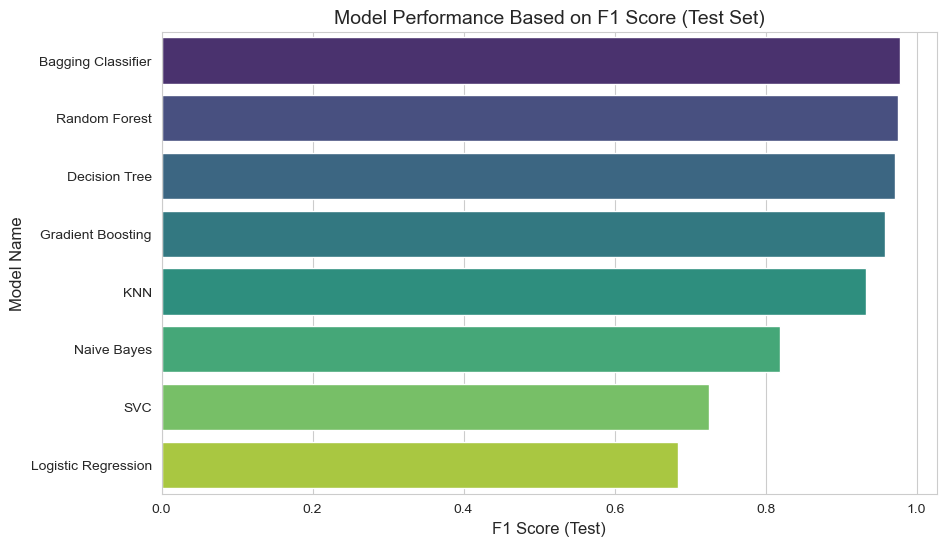

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# List to store model performance
model_summary = []

# Assuming models are already trained
models = {
    "Logistic Regression": model_LR4,
    "Decision Tree": model_DT4,
    "Random Forest": model_RF4,
    "Bagging Classifier": model_BC4,
    "KNN": model_KNN4,
    "Naive Bayes": model_NB4,
    "SVC": model_SVC4,
    "Gradient Boosting": model_GB4
}

# Loop through each trained model and store results
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_summary.append({
        "model_name": name,
        "accuracy_train": accuracy_score(y_train, y_pred_train),
        "accuracy_test": accuracy_score(y_test, y_pred_test),
        "f1_score_train": f1_score(y_train, y_pred_train, average='weighted'),
        "f1_score_test": f1_score(y_test, y_pred_test, average='weighted'),
        "precision_train": precision_score(y_train, y_pred_train, average='weighted'),
        "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
        "recall_train": recall_score(y_train, y_pred_train, average='weighted'),
        "recall_test": recall_score(y_test, y_pred_test, average='weighted')
    })

# Convert to DataFrame and sort by F1 score
summary_4= pd.DataFrame(model_summary).sort_values('f1_score_test', ascending=False)

# ✅ Ensure 'model_name' is NOT removed
# summary.drop(columns=['model_name'], inplace=True)  # ❌ Do NOT drop this column!

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=summary_4['model_name'], x=summary_4['f1_score_test'], palette="viridis")

# Labels and title
plt.xlabel('F1 Score (Test)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.title('Model Performance Based on F1 Score (Test Set)', fontsize=14)

# Show plot
plt.show()

In [265]:
summary_4

,model_name,accuracy_train,accuracy_test,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
3,Bagging Classifier,0.997762,0.977757,0.997758,0.977523,0.997765,0.977633,0.997762,0.977757
2,Random Forest,1.000000,0.975826,1.000000,0.975543,1.000000,0.975660,1.000000,0.975826
1,Decision Tree,1.000000,0.971892,1.000000,0.971854,1.000000,0.971848,1.000000,0.971892
7,Gradient Boosting,0.962786,0.959162,0.962182,0.958365,0.962310,0.958607,0.962786,0.959162
4,KNN,0.953620,0.934487,0.952882,0.933419,0.952642,0.932921,0.953620,0.934487
5,Naive Bayes,0.805101,0.801244,0.823134,0.819685,0.879957,0.877077,0.805101,0.801244
6,SVC,0.809975,0.809970,0.724937,0.724931,0.656059,0.656051,0.809975,0.809970
0,Logistic Regression,0.648949,0.655200,0.678498,0.683483,0.711762,0.715353,0.648949,0.655200


In [266]:
#model creation
#model initialization
category_classification_model=BaggingClassifier()

#fitting the model
category_classification_model.fit(X_train,y_train)

#predicting using the model
category_classification_pred=category_classification_model.predict(X_test)

#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,category_classification_pred))
print('\n')
print('classification report')
print(classification_report(y_test,category_classification_pred))
print('==='*10)

metrics on test data
confusion matrix
[[    3     0     0]
 [    0 11241    84]
 [    0   228  2426]]


classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.98      0.99      0.99     11325
           3       0.97      0.91      0.94      2654

    accuracy                           0.98     13982
   macro avg       0.98      0.97      0.98     13982
weighted avg       0.98      0.98      0.98     13982



In [267]:
import pickle
with open('ITSM_Predicted.pkl', 'wb') as file:
    pickle.dump(data, file)

print("ITSM_Predicted file has been saved as a pickle file")

ITSM_Predicted file has been saved as a pickle file


In [ ]:
out = data[['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear',
            'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
            'YearsWithCurrManager',
           ']]